# Visualisation de la distribution des classes en fonction des méthodes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
import os
import pandas as pd

def extract_distributions(directory):
    distributions = {'Raw': [], 'Optimise': [], 'Over': []}
    patients = set()
    
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.csv'):
                filepath = os.path.join(root, filename)
                patient = os.path.basename(root)
                patients.add(patient)
                df = pd.read_csv(filepath)
                if 'optimise' in filename.lower():
                    method = 'Optimise'
                elif 'over' in filename.lower():
                    method = 'Over'
                elif 'raw' in filename.lower():
                    method = 'Raw'
                else:
                    continue
                
                dist_0 = df.get('Train Distribution 0')
                dist_1 = df.get('Train Distribution 1')
                
                if dist_0 is not None and dist_1 is not None:
                    distributions[method].append({
                        'filename': filename,
                        'patient': patient,
                        'train_distribution_0': dist_0.tolist(),
                        'train_distribution_1': dist_1.tolist()
                    })
    
    return distributions, list(patients)

def plot_distributions(distributions, patients):
    methods = list(distributions.keys())
    
    # Préparer les données
    non_fog_data = {method: {patient: [] for patient in patients} for method in methods}
    fog_data = {method: {patient: [] for patient in patients} for method in methods}
    
    for method in methods:
        for dist in distributions[method]:
            patient = dist['patient']
            non_fog_data[method][patient] += dist['train_distribution_0']
            fog_data[method][patient] += dist['train_distribution_1']
    
    # Création des graphiques
    fig, ax = plt.subplots(figsize=(20, 10))
    
    bar_width = 0.25
    index = np.arange(len(patients))
    
    # Tracer chaque méthode
    for i, method in enumerate(methods):
        non_fog_heights = [sum(non_fog_data[method][patient]) for patient in patients]
        fog_heights = [sum(fog_data[method][patient]) for patient in patients]
        
        non_fog_bars = ax.bar(index + i * bar_width, non_fog_heights, bar_width, label='Classe Non-Fog' if i == 0 else "", color='skyblue', edgecolor='black')
        fog_bars = ax.bar(index + i * bar_width, fog_heights, bar_width, bottom=np.array(non_fog_heights), label='Classe Fog' if i == 0 else "", color='salmon', edgecolor='black')
        
        # Ajouter du texte à l'intérieur des barres
        for j, bar in enumerate(non_fog_bars):
            height = bar.get_height()
            total_height = height + fog_bars[j].get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, total_height / 2.0, method, ha='center', va='center', rotation='vertical', color='white', fontsize=20)
    
    # Définir la taille des polices
    ax.set_xlabel('Patient', fontsize=20)
    ax.set_ylabel('Nombre de Fenêtres de 2s', fontsize=20)
    ax.set_title('Comparaison de la Distribution des Classes selon les Méthodes de Rééquilibrage', fontsize=24)
    
    # Définir la taille des étiquettes des axes
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(patients, fontsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Ajouter une légende et une grille
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
    plt.tight_layout()
    plt.show()



In [ ]:
# # Récupérer les distributions et les patients
# distributions, patients = extract_distributions(directory_path)

# # Générer le graphique
# plot_distributions(distributions, patients)

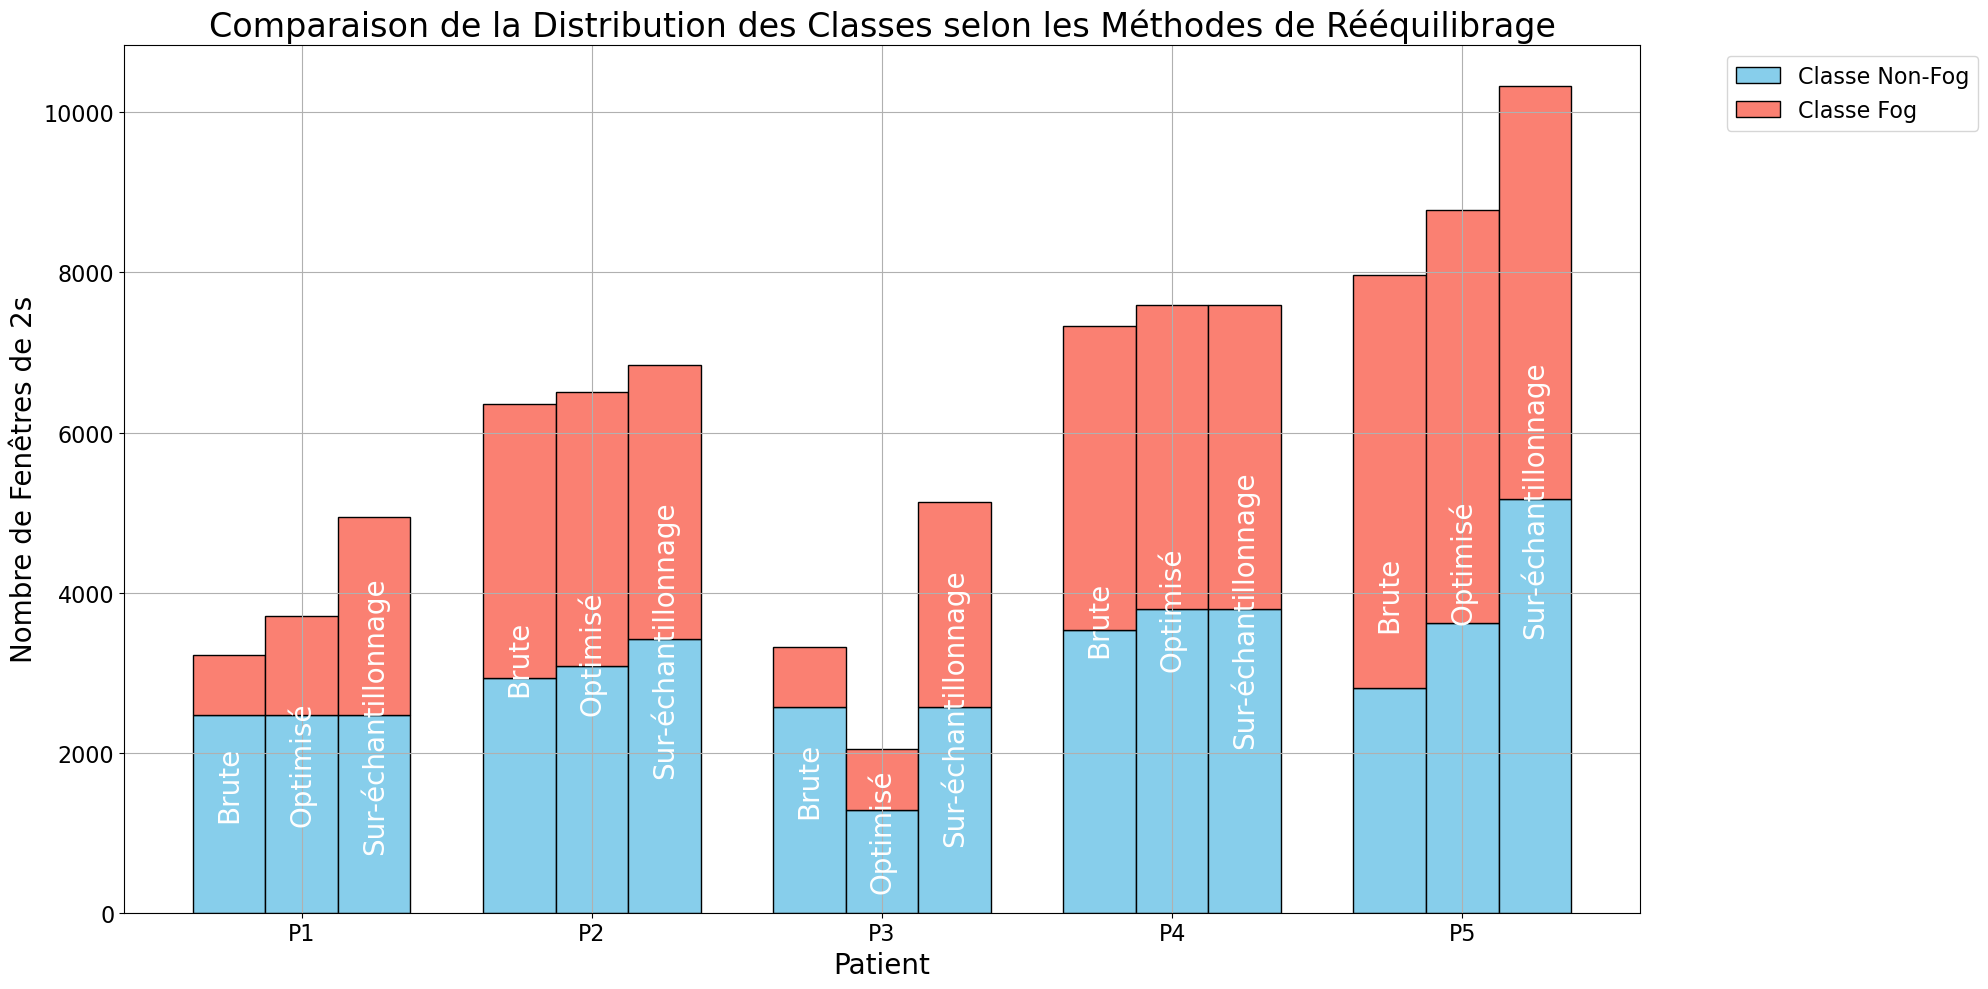

In [7]:
file_path = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_resampling_by_patient/class_distribution_details.csv'
class_distribution_data = pd.read_csv(file_path)

# Data preparation
patients = class_distribution_data['Patient']
methods = ['Brute', 'Optimisé', 'Sur-échantillonnage']

non_fog_data = {
    'Brute': class_distribution_data['Brute – Classe Non-Fog'],
    'Optimisé': class_distribution_data['Optimisé – Classe Non-Fog'],
    'Sur-échantillonnage': class_distribution_data['Sur-échantillonnage – Classe Non-Fog']
}

fog_data = {
    'Brute': class_distribution_data['Brute – Classe Fog'],
    'Optimisé': class_distribution_data['Optimisé – Classe Fog'],
    'Sur-échantillonnage': class_distribution_data['Sur-échantillonnage – Classe Fog']
}
# Plotting with significantly increased font size for all texts including legends, inside bar text, and axis labels
fig, ax = plt.subplots(figsize=(20, 10))

bar_width = 0.25
index = np.arange(len(patients))

# Plot each method with skyblue for Classe Non-Fog and salmon for Classe Fog with borders
for i, method in enumerate(methods):
    non_fog_bars = ax.bar(index + i * bar_width, non_fog_data[method], bar_width, label='Classe Non-Fog' if i == 0 else "", color='skyblue', edgecolor='black')
    fog_bars = ax.bar(index + i * bar_width, fog_data[method], bar_width, bottom=non_fog_data[method], label='Classe Fog' if i == 0 else "", color='salmon', edgecolor='black')

    # Adding text inside bars, centered with significantly increased font size
    for j, bar in enumerate(non_fog_bars):
        height = bar.get_height()
        total_height = height + fog_bars[j].get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, total_height / 2.0, method, ha='center', va='center', rotation='vertical', color='white', fontsize=20)

# Setting significantly larger font size for axis labels and title
ax.set_xlabel('Patient', fontsize=20)
ax.set_ylabel('Nombre de Fenêtres de 2s', fontsize=20)
ax.set_title('Comparaison de la Distribution des Classes selon les Méthodes de Rééquilibrage', fontsize=24)

# Setting larger font size for x-ticks and y-ticks
ax.set_xticks(index + bar_width)
ax.set_xticklabels(patients, fontsize=16)
ax.tick_params(axis='y', labelsize=16)

# Setting larger font size for the legend
# ax.legend(loc='upper right', fontsize=16)
# Add grid
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()


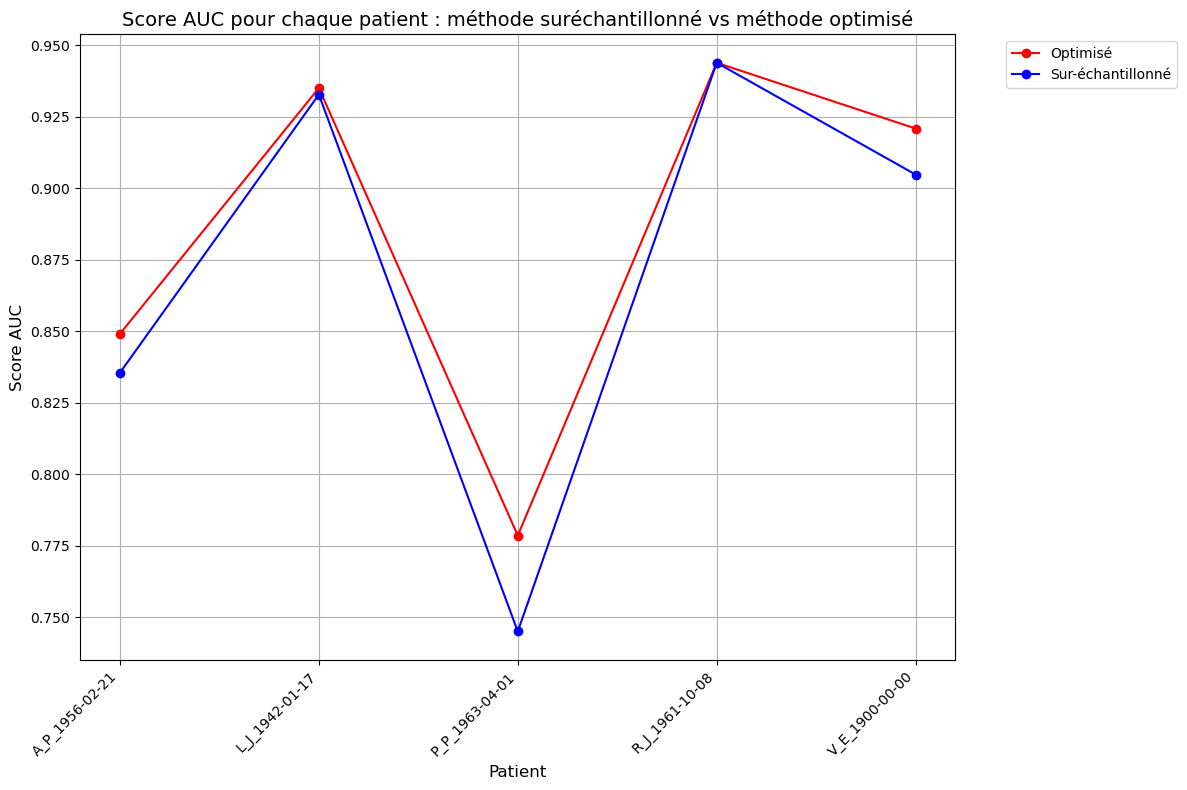

In [3]:
file_path = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_resampling_by_patient/class_distribution_details.csv'
class_distribution_data = pd.read_csv(file_path)

# Corrected column names
auc_optimized = class_distribution_data['AUC Score – Optimisé ']
auc_oversampled = class_distribution_data['AUC Score – Sur-échantillonné']


# Define a color palette with distinct colors
colors = ['red', 'blue']

# Create the plot with specified size
plt.figure(figsize=(12, 8))

# Plot the AUC scores for each patient with distinct colors
plt.plot(patients, auc_optimized, marker='o', linestyle='-', color=colors[0], label='Optimisé')
plt.plot(patients, auc_oversampled, marker='o', linestyle='-', color=colors[1], label='Sur-échantillonné')

# Add labels and title
plt.title('Score AUC pour chaque patient : méthode suréchantillonné vs méthode optimisé', fontsize=14)
plt.xlabel('Patient', fontsize=12)
plt.ylabel('Score AUC', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(True)

# Add legend and place it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with tight layout
plt.tight_layout()
plt.show()



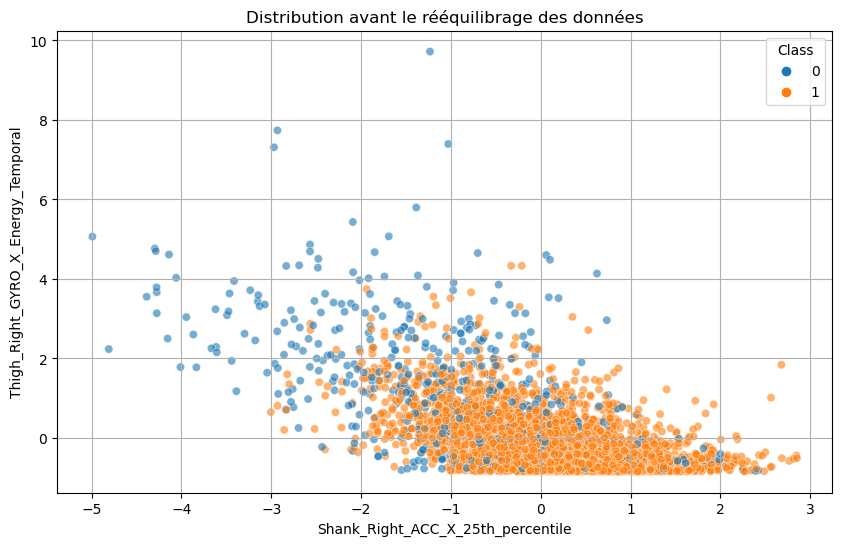

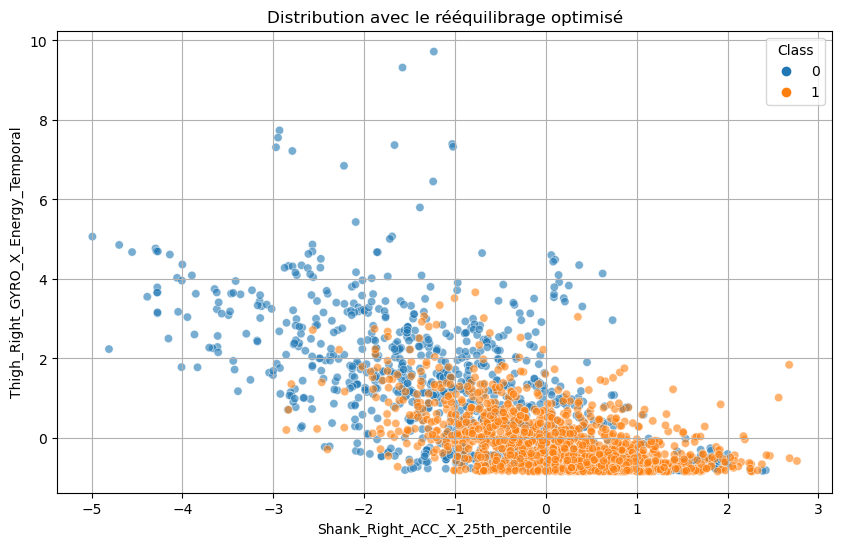

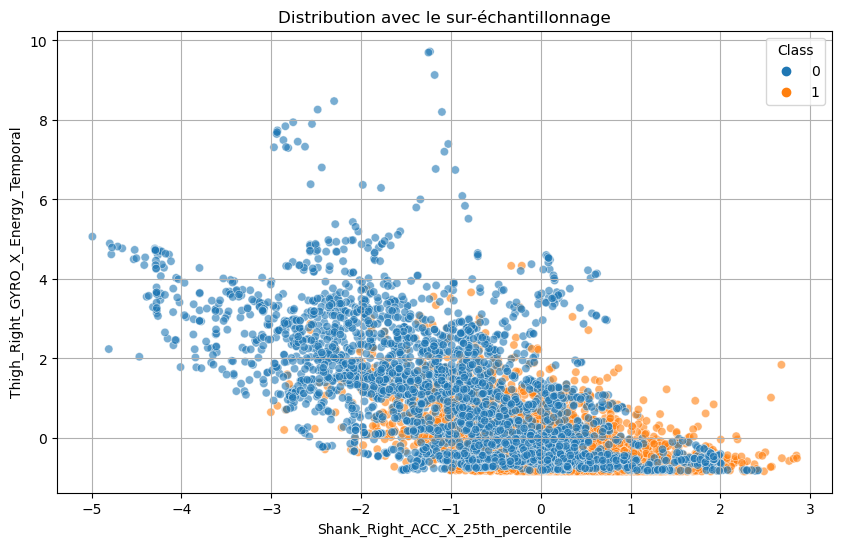

In [7]:
# Fonction pour créer un nuage de points
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train_initial = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_brut.csv')
y_train_initial = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/train/Y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_brut.csv')

X_optimise = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_optimise/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_optimise.csv')
y_optimise = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_optimise/train/y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_optimise.csv')


X_over = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')
y_over = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')

def plot_data(X, y, features, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[features[0]], y=X[features[1]], hue=y.squeeze(), alpha=0.6)  # Assurez-vous que y est une série pour hue
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# Nom des caractéristiques à visualiser
features = ["Shank_Right_ACC_X_25th_percentile", "Thigh_Right_GYRO_X_Energy_Temporal"]

# Affichage des graphiques
plot_data(X_train_initial, y_train_initial, features, "Distribution avant le rééquilibrage des données")
plot_data(X_optimise, y_optimise, features, "Distribution avec le rééquilibrage optimisé")
plot_data(X_over, y_over, features, "Distribution avec le sur-échantillonnage")

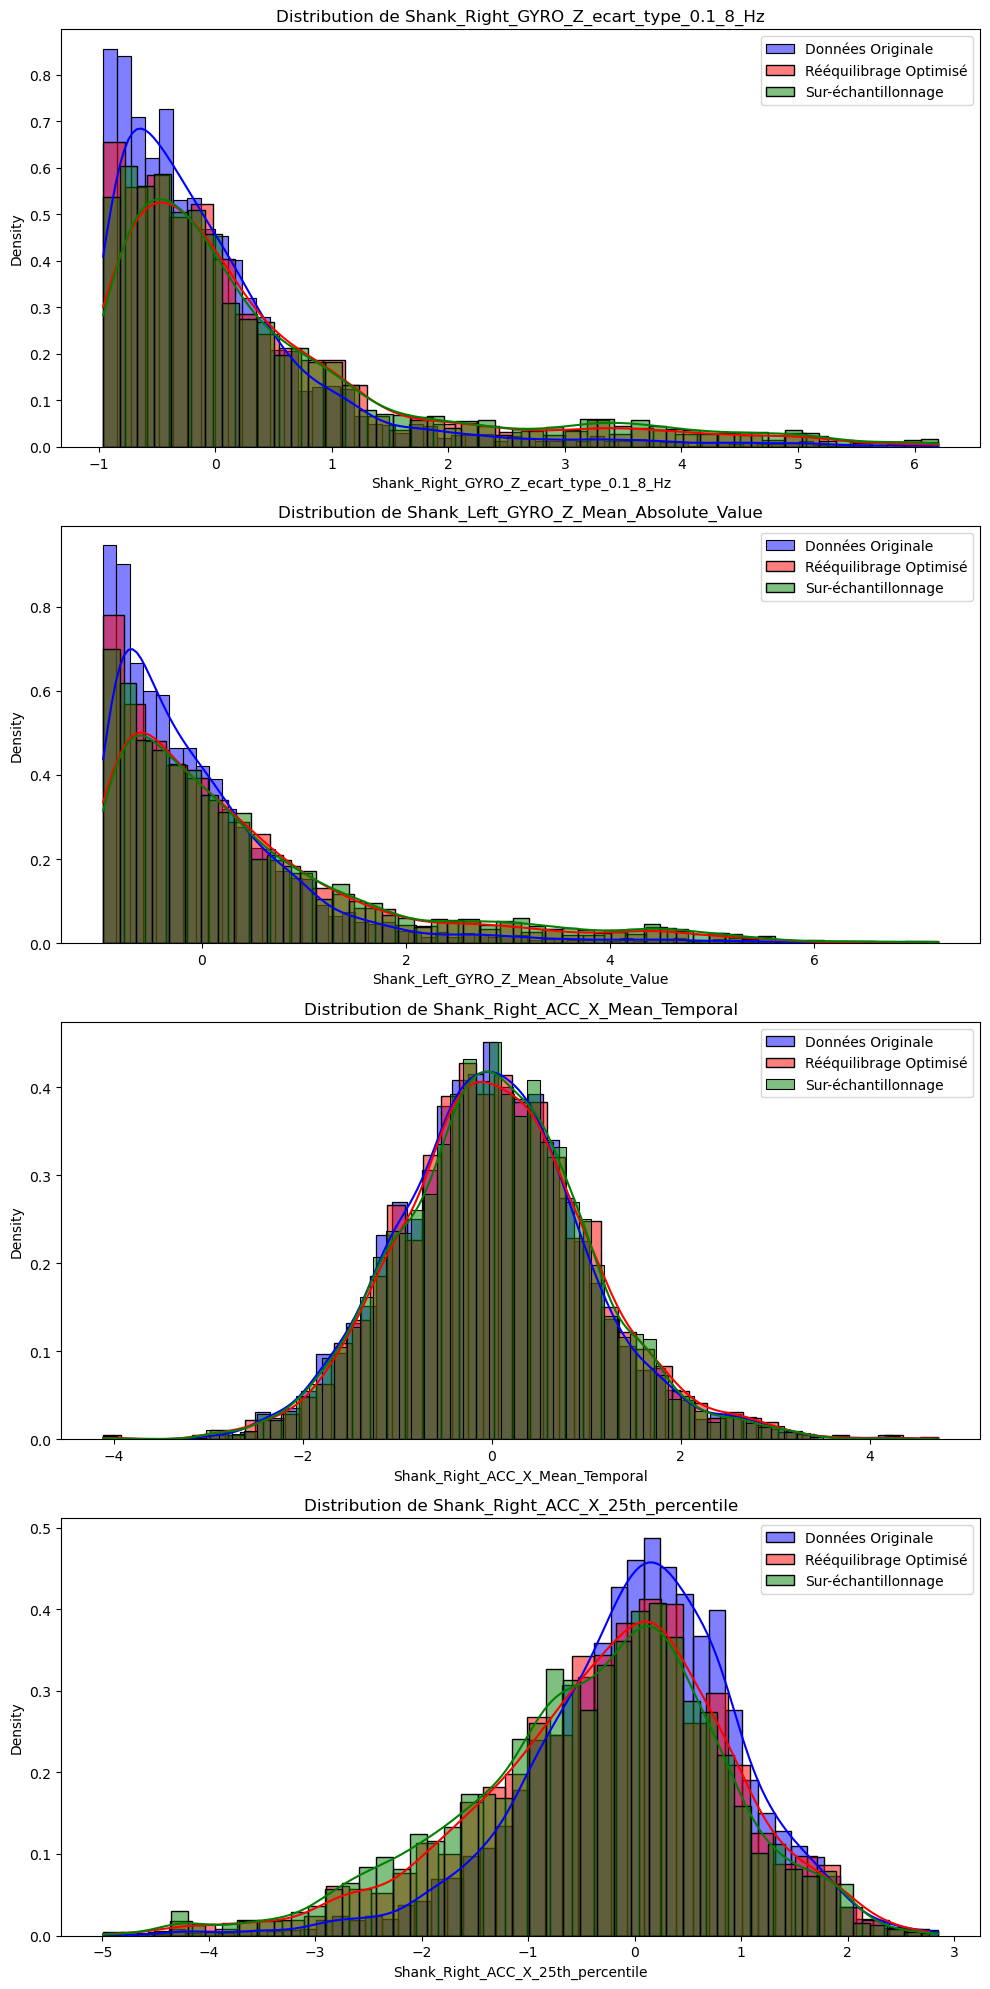

In [8]:
# Sélection des caractéristiques spécifiques à visualiser
features_to_plot = ["Shank_Right_GYRO_Z_ecart_type_0.1_8_Hz", "Shank_Left_GYRO_Z_Mean_Absolute_Value", "Shank_Right_ACC_X_Mean_Temporal", "Shank_Right_ACC_X_25th_percentile"]

# Fonction pour tracer les distributions des caractéristiques
def plot_feature_distributions(df1, df2, df3, feature_names, df1_label='Données Originale', df2_label='Rééquilibrage Optimisé', df3_label='Sur-échantillonnage'):
    fig, axes = plt.subplots(nrows=len(feature_names), ncols=1, figsize=(10, 5 * len(feature_names)))
    for i, feature in enumerate(feature_names):
        ax = axes[i] if len(feature_names) > 1 else axes
        sns.histplot(df1[feature], color="blue", label=df1_label, kde=True, ax=ax, stat="density", common_norm=False)
        sns.histplot(df2[feature], color="red", label=df2_label, kde=True, ax=ax, stat="density", common_norm=False)
        sns.histplot(df3[feature], color="green", label=df3_label, kde=True, ax=ax, stat="density", common_norm=False)
        ax.set_title(f'Distribution de {feature}')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour tracer les distributions des caractéristiques choisies
plot_feature_distributions(X_train_initial, X_optimise, X_over, features_to_plot)

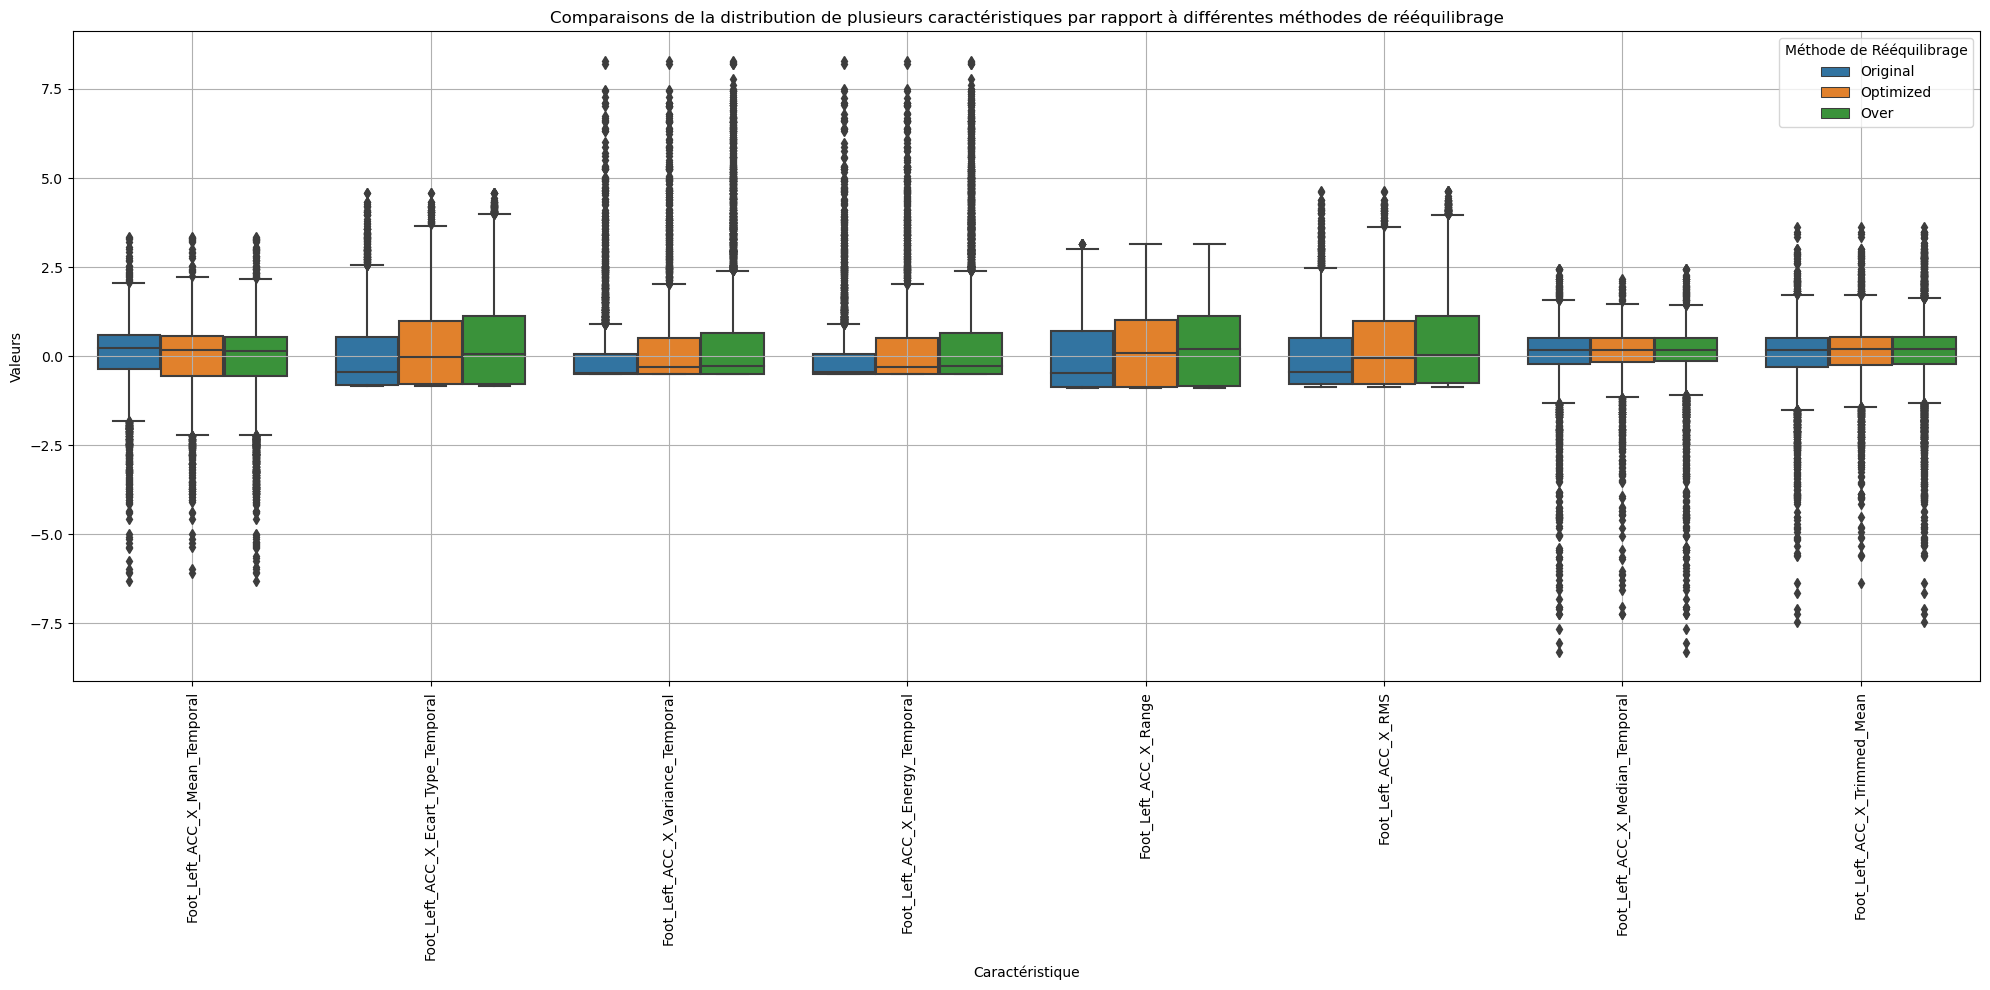

In [9]:
# Liste des caractéristiques à visualiser
features_to_plot = X_train_initial.columns[:8]  # Ajustez pour inclure les caractéristiques souhaitées

# Fonction pour tracer les boxplots des caractéristiques
def plot_feature_boxplots(df1, df2, df3, feature_names):
    # Concaténation des DataFrames pour faciliter la visualisation
    data = pd.concat([df1[feature_names], df2[feature_names], df3[feature_names]], keys=['Original', 'Optimized', 'Over'], axis=0)
    data = data.reset_index(level=0).rename(columns={'level_0': 'Method'})
    data = data.melt(id_vars='Method', var_name='Feature', value_name='Value')

    # Création des boxplots
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=data, x='Feature', y='Value', hue='Method')
    plt.xticks(rotation=90)
    plt.title('Comparaisons de la distribution de plusieurs caractéristiques par rapport à différentes méthodes de rééquilibrage')
    plt.xlabel('Caractéristique')
    plt.ylabel('Valeurs')
    plt.legend(title='Méthode de Rééquilibrage')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour tracer les boxplots des caractéristiques choisies
plot_feature_boxplots(X_train_initial, X_optimise, X_over, features_to_plot)

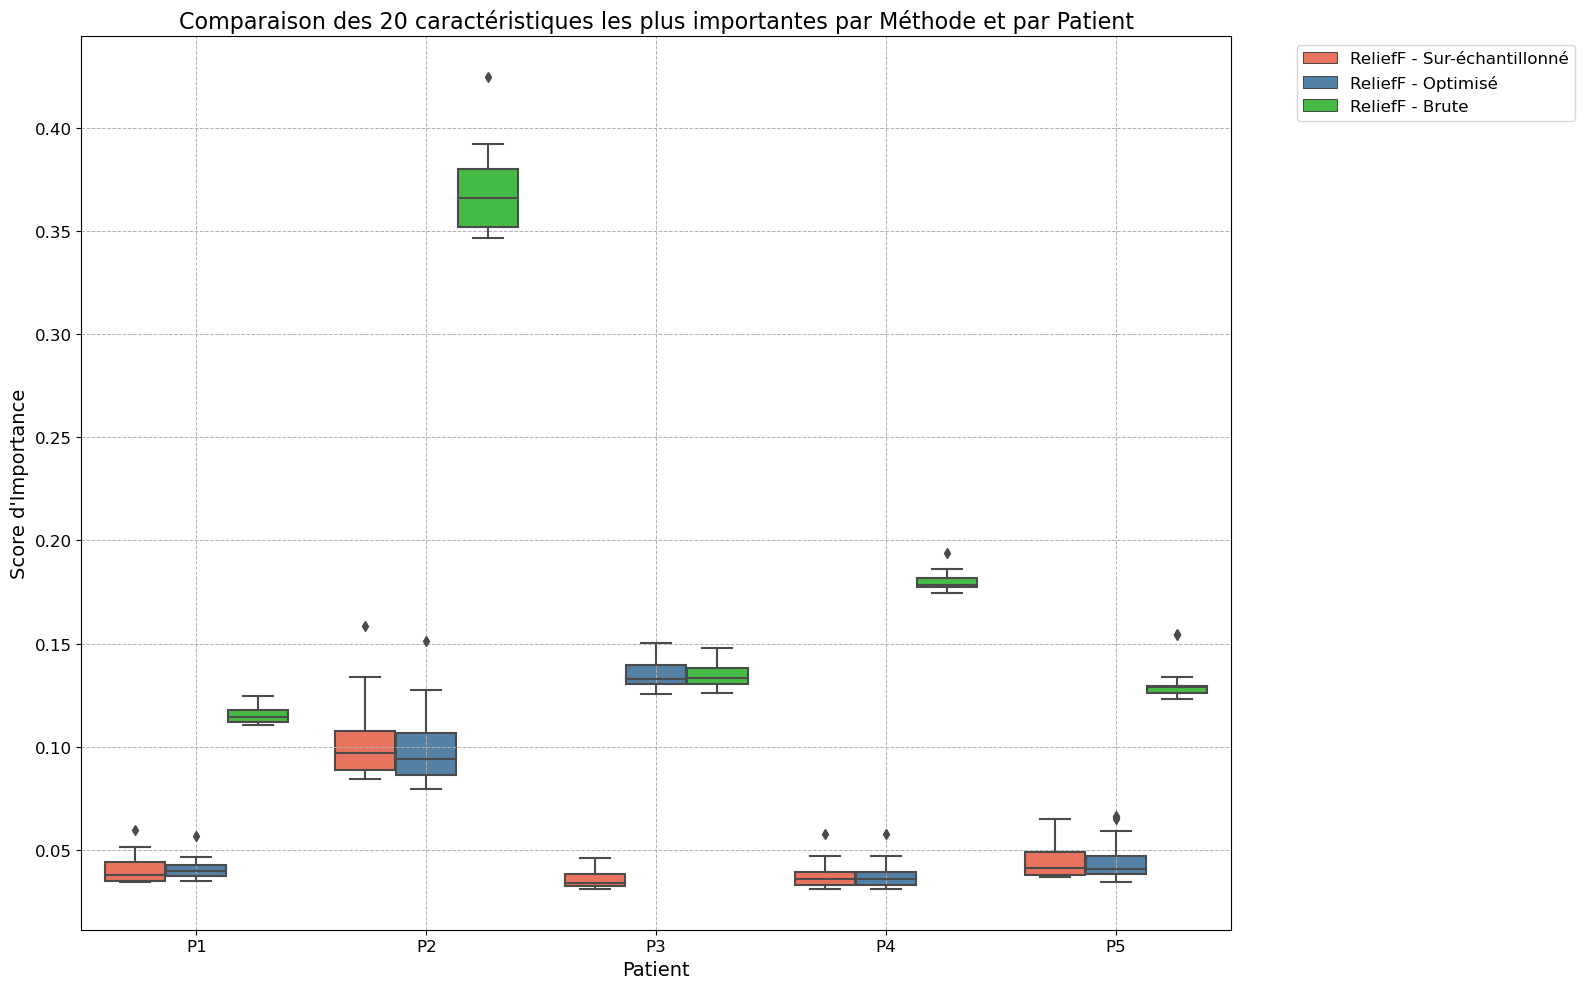

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin du dossier où tous les fichiers CSV avec les scores sont stockés
output_folder = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient'

# Fonction pour extraire l'identifiant du patient à partir du nom du fichier
def extract_patient_id(filename):
    return '_'.join(filename.split('_')[:3])

# Fonction pour charger les données des scores d'importance de ReliefF selon le suffixe et regrouper par patient
def load_relief_scores(directory, suffix, label):
    scores = pd.DataFrame()
    for file in os.listdir(directory):
        if file.endswith(f'{suffix}.csv'):
            file_path = os.path.join(directory, file)
            df_temp = pd.read_csv(file_path).head(20)
            df_temp['Méthode'] = label
            df_temp['Patient'] = extract_patient_id(file)
            scores = pd.concat([scores, df_temp], ignore_index=True)
    return scores

# Charger les données pour chaque configuration en utilisant des suffixes spécifiques
scores_over = load_relief_scores(output_folder, 'over100_feature_importances', 'ReliefF - Sur-échantillonné')
scores_optimise = load_relief_scores(output_folder, 'optimise_feature_importances', 'ReliefF - Optimisé')
scores_data_brute = load_relief_scores(output_folder, 'brut_feature_importances', 'ReliefF - Brute')

# Agglomérer toutes les données dans un seul DataFrame
all_scores = pd.concat([scores_over, scores_optimise, scores_data_brute], ignore_index=True)

# Définir une palette de couleurs vives pour les nouvelles méthodes
palette = {
    'ReliefF - Sur-échantillonné': "#FF6347", 
    'ReliefF - Optimisé': "#4682B4", 
    'ReliefF - Brute': "#32CD32"
}

# Identifier les patients uniques et créer un dictionnaire de mappage
unique_patients = all_scores['Patient'].unique()
patient_mapping = {patient: f'P{i+1}' for i, patient in enumerate(unique_patients)}

# Appliquer le mappage aux noms des patients
all_scores['Patient'] = all_scores['Patient'].map(patient_mapping)

# Créer une colonne combinée 'Patient_Méthode' pour séparer les boxplots
#all_scores['Patient_Méthode'] = all_scores['Patient'] + ' - ' + all_scores['Méthode']

# Création du graphique
plt.figure(figsize=(16, 10))
sns.boxplot(data=all_scores, x='Patient', y='Score', hue='Méthode', palette=palette, dodge=True)

# Ajouter une grille
plt.grid(True, linestyle='--', linewidth=0.7)

# Configurer les étiquettes et le titre
plt.title('Comparaison des 20 caractéristiques les plus importantes par Méthode et par Patient', fontsize=16)
plt.xlabel('Patient', fontsize=14)
plt.ylabel('Score d\'Importance', fontsize=14)
plt.xticks(ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Placer la légende en haut à gauche
# plt.legend(title='', loc='upper left', fontsize=12, title_fontsize=14, frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12, title_fontsize=14, frameon=True)
# Afficher le graphique
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# Présumons que all_scores est déjà chargé
# Création d'un dictionnaire pour stocker les DataFrames par patient
patient_dfs = {}

# Itérer sur chaque combinaison unique de patient et méthode
for (patient, methode), group in all_scores.groupby(['Patient', 'Méthode']):
    # Sélectionner les 5 meilleures caractéristiques pour cette combinaison
    top_features = group.nlargest(5, 'Score')[['Feature', 'Score']]
    
    # Créer ou ajouter au DataFrame pour ce patient
    if patient not in patient_dfs:
        patient_dfs[patient] = {}
    patient_dfs[patient][methode] = top_features

# Chemin de base pour sauvegarder les fichiers
base_path = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/Top_Features/'

# Sauvegarder chaque DataFrame dans un fichier Excel, une feuille par méthode
for patient, methods in patient_dfs.items():
    with pd.ExcelWriter(f'{base_path}{patient}.xlsx') as writer:
        for method, df in methods.items():
            df.to_excel(writer, sheet_name=method, index=False)

    print(f"Tableau pour {patient} sauvegardé avec succès.")


Tableau pour A_P_1956-02-21_OFF sauvegardé avec succès.
Tableau pour A_P_1956-02-21_ON sauvegardé avec succès.
Tableau pour L_J_1942-01-17_OFF sauvegardé avec succès.
Tableau pour L_J_1942-01-17_ON sauvegardé avec succès.
Tableau pour P_P_1963-04-01_OFF sauvegardé avec succès.
Tableau pour P_P_1963-04-01_ON sauvegardé avec succès.
Tableau pour R_J_1961-10-08_OFF sauvegardé avec succès.
Tableau pour R_J_1961-10-08_ON sauvegardé avec succès.
Tableau pour V_E_1900-00-00_OFF sauvegardé avec succès.
Tableau pour V_E_1900-00-00_ON sauvegardé avec succès.


# Visualisation ML

# Pour données over, optimisé, brute

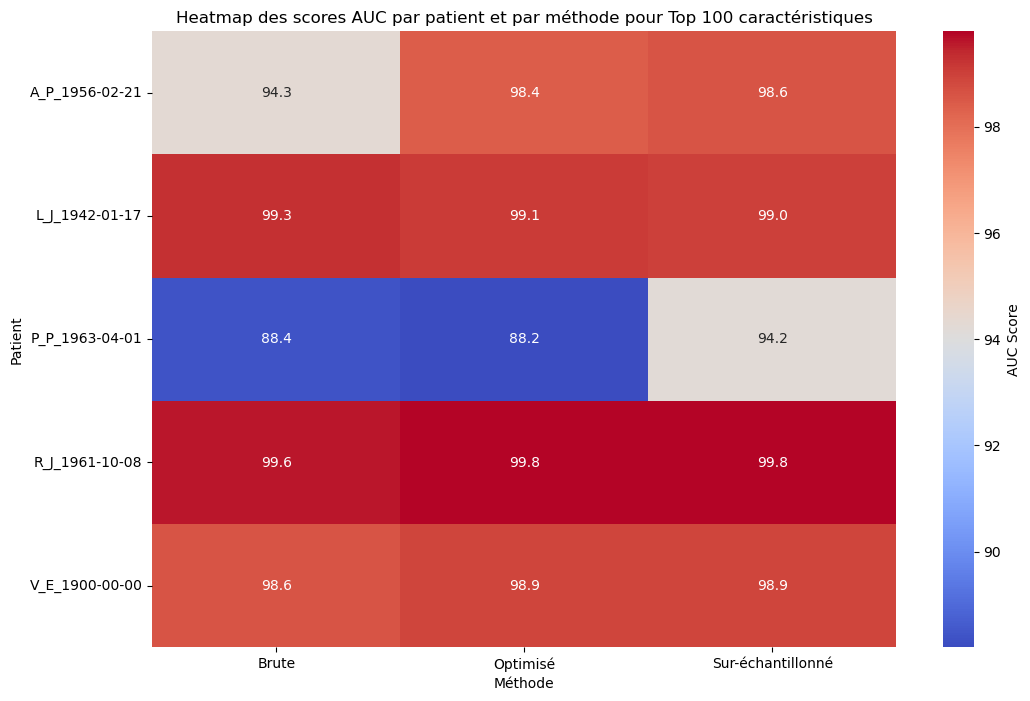

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les fichiers CSV
file_path_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_brut_modified.csv"
file_path_optimise = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_optimise_modified.csv"
file_path_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100_modified.csv"

df_brut = pd.read_csv(file_path_brute)
df_optimise = pd.read_csv(file_path_optimise)
df_over = pd.read_csv(file_path_over)

# Ajouter une colonne pour indiquer la méthode
df_brut['Method'] = 'Brute'
df_optimise['Method'] = 'Optimisé'
df_over['Method'] = 'Sur-échantillonné'

# Filtrer les données pour n = 100 caractéristiques
df_brut = df_brut[df_brut['Top N Features'] == 100]
df_optimise = df_optimise[df_optimise['Top N Features'] == 100]
df_over = df_over[df_over['Top N Features'] == 100]

# Combiner les DataFrames
df_combined = pd.concat([df_brut, df_optimise, df_over])

# Sélectionner les colonnes pertinentes
df_combined = df_combined[['Identifier', 'AUC', 'Method']]

# Renommer les colonnes pour faciliter la compréhension
df_combined.columns = ['Patient', 'AUC', 'Method']

# Enlever "_all_extraction_features" des noms de patients
df_combined['Patient'] = df_combined['Patient'].str.replace('_all_extraction_features', '')

# Créer une pivot table pour les scores AUC par patient et méthode
pivot_table = df_combined.pivot(index='Patient', columns='Method', values='AUC')

# Tracer les heatmaps avec des couleurs chaudes pour les scores élevés et froides pour les scores bas
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'AUC Score'})
plt.title('Heatmap des scores AUC par patient et par méthode pour Top 100 caractéristiques')
plt.xlabel('Méthode')
plt.ylabel('Patient')

# Ajuster l'orientation des étiquettes de l'axe des y
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.show()


## Pour données over

c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

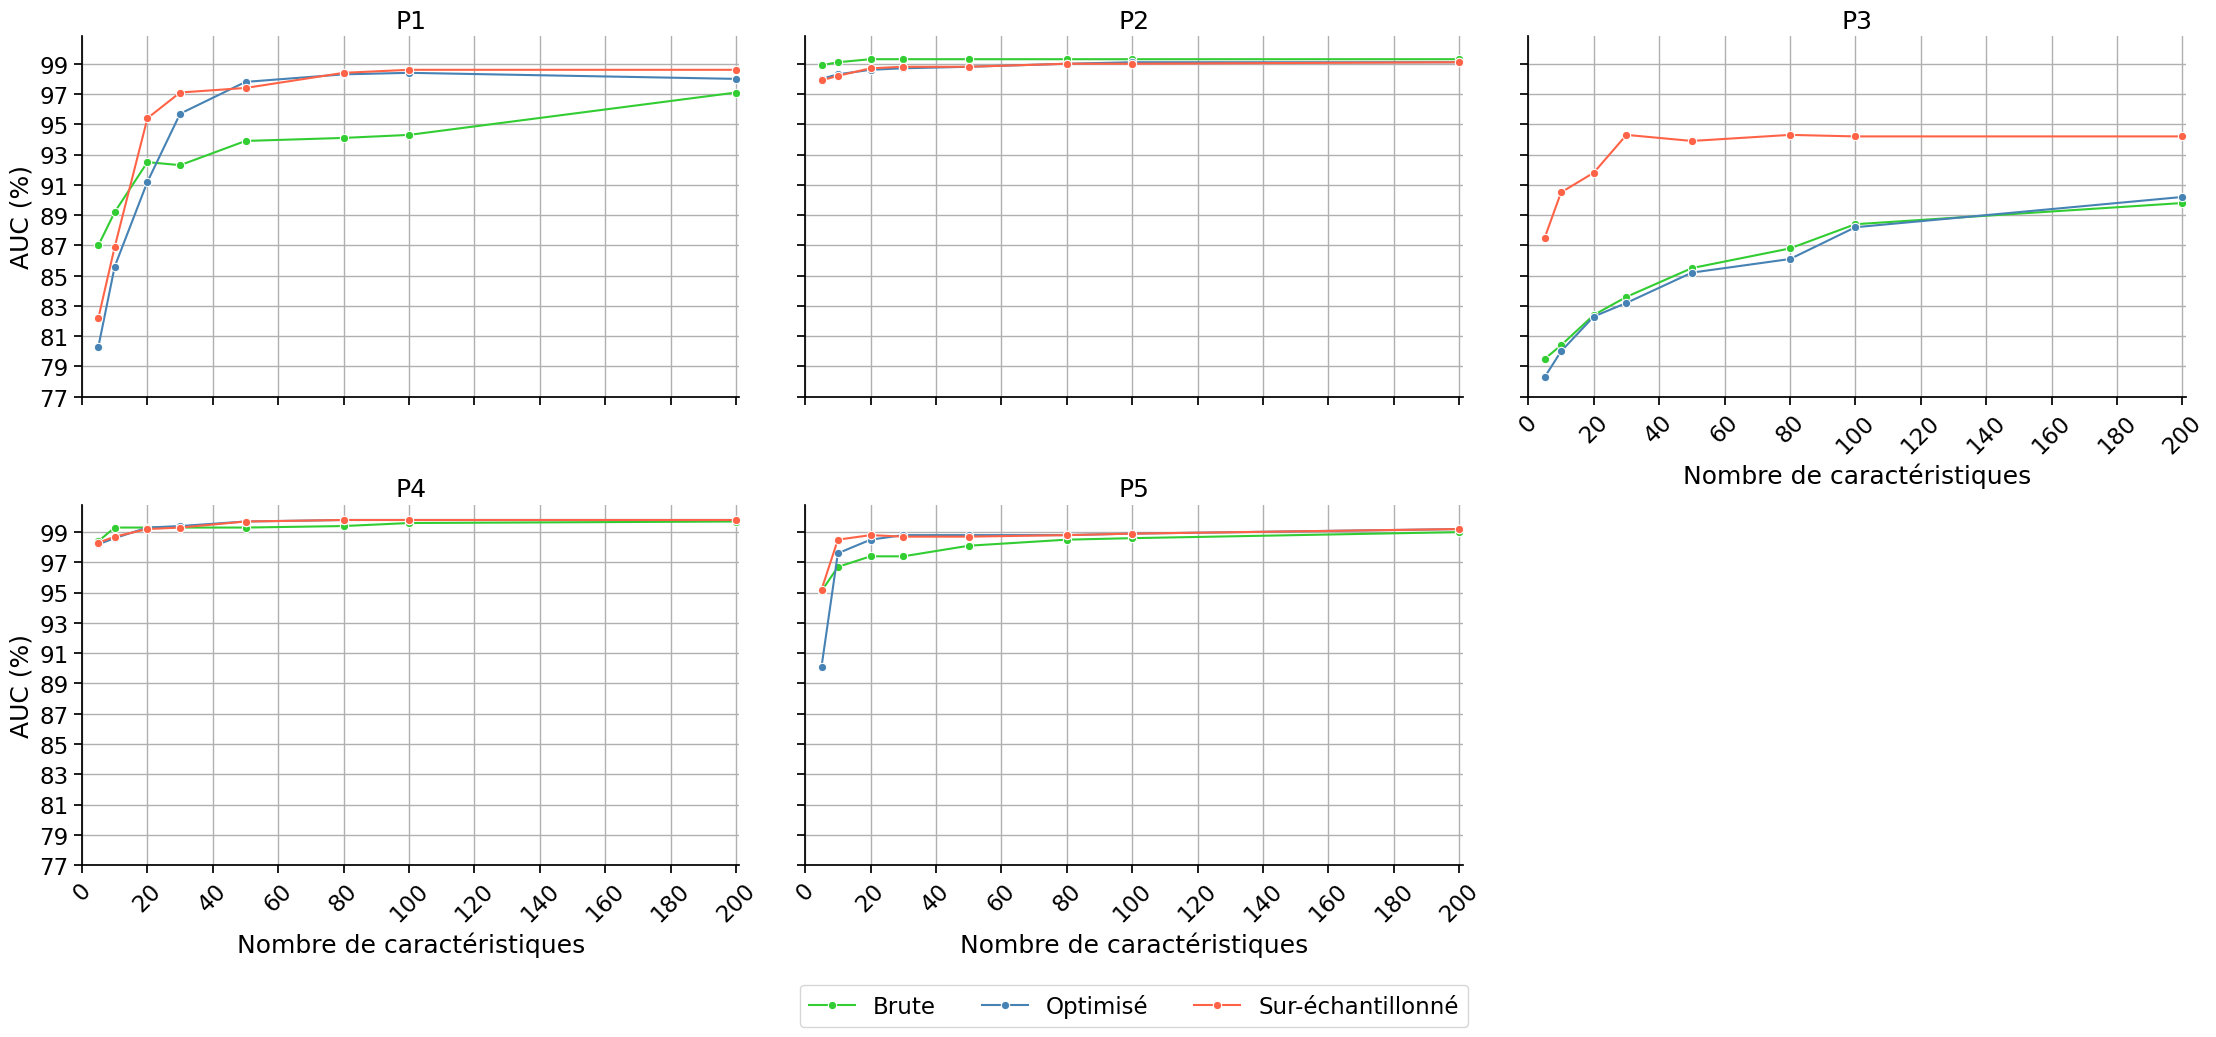

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100_modified.csv"
file_path_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_brut_modified.csv"
file_path_optimise = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_optimise_modified.csv"

df_brut = pd.read_csv(file_path_brute)
df_optimise = pd.read_csv(file_path_optimise)
df_over = pd.read_csv(file_path_over)

# Ajouter une colonne pour indiquer la méthode
df_optimise['Method'] = 'Optimisé'
df_over['Method'] = 'Sur-échantillonné'
df_brut['Method'] = 'Brute'

# Combiner les DataFrames
df_combined = pd.concat([df_brut, df_optimise, df_over])

# Enlever "_all_extraction_features" des noms de patients
df_combined['Patient'] = df_combined['Identifier'].str.replace('_all_extraction_features', '')

# Créer un dictionnaire de mappage pour renommer les patients
patient_mapping = {
    'A_P_1956-02-21': 'P1',
    'L_J_1942-01-17': 'P2',
    'P_P_1963-04-01': 'P3',
    'R_J_1961-10-08': 'P4',
    'V_E_1900-00-00': 'P5'
}

# Remplacer les noms des patients
df_combined['Patient'] = df_combined['Patient'].map(patient_mapping)

# Définir la palette de couleurs
palette = {
    'Sur-échantillonné': "#FF6347", 
    'Optimisé': "#4682B4", 
    'Brute': "#32CD32"
}

# Ajuster les paramètres de style de Seaborn pour augmenter la taille de la police
sns.set_context("notebook", font_scale=1.5)

# Créer le FacetGrid
g = sns.FacetGrid(df_combined, col="Patient", hue="Method", col_wrap=3, sharey=True, sharex=True, palette=palette, height=5, aspect=1.5)
g.map(sns.lineplot, "Top N Features", "AUC", marker='o')

# Ajouter une grille à chaque graphique
def add_grid(*args, **kwargs):
    ax = plt.gca()
    ax.grid(True)
    ax.set_ylim(77, df_combined["AUC"].max() + 1)
    ax.set_yticks(range(77, int(df_combined["AUC"].max() + 1), 2))
    ax.set_xlim(0, df_combined["Top N Features"].max() + 1)
    ax.set_xticks(range(0, int(df_combined["Top N Features"].max()) + 1, 20))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

g.map(add_grid)

# Ajuster les labels des axes
g.set_axis_labels("Nombre de caractéristiques", "AUC (%)")

# Ajuster les titres des facettes pour enlever "Patient ="
for ax in g.axes.flat:
    title = ax.get_title().replace('Patient = ', '')
    ax.set_title(title)

# Ajuster la disposition pour avoir une bonne séparation entre les facettes
plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Ajouter la légende personnalisée
handles, labels = g.axes[0].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=3)

# Afficher le graphique
plt.show()

### Comparaison AUC pour différentes caracctéristiques

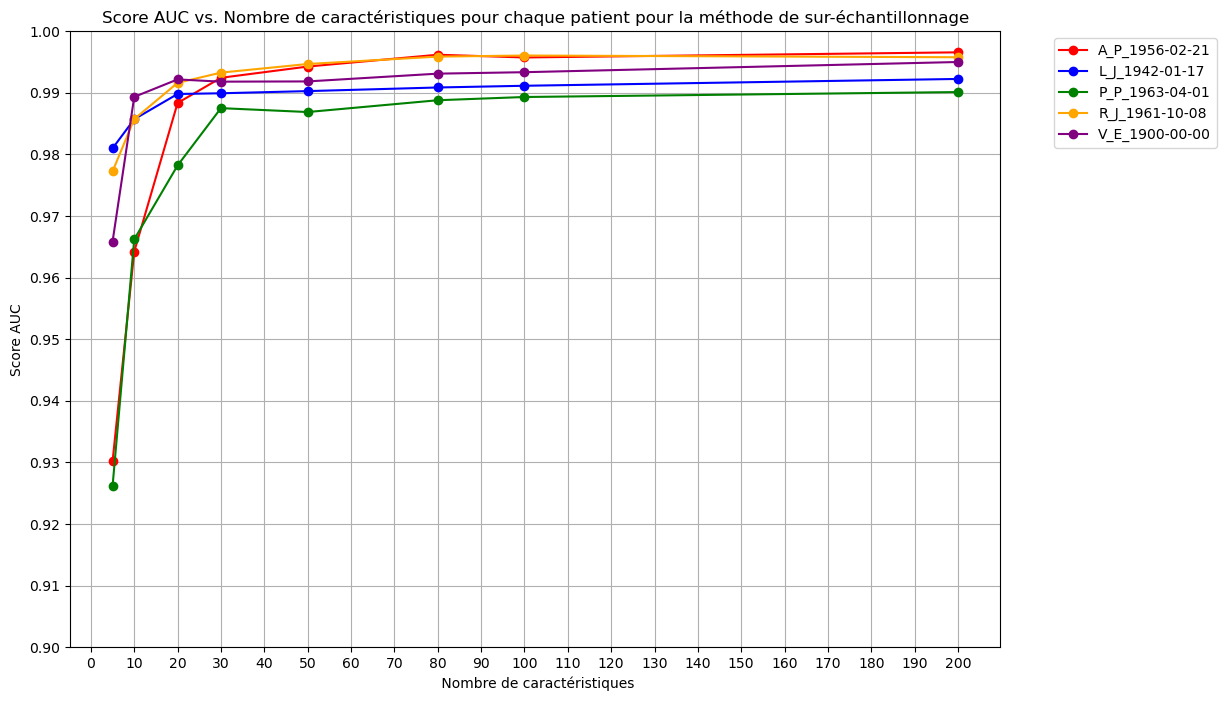

In [4]:
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100.csv"
data = pd.read_csv(file_path)

# Plotting the AUC curve for each patient on the same graph with more distinctive colors and simplified legend
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = data['Identifier'].unique()

# Plot each patient's AUC curve with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = data[data['Identifier'] == patient_id]
    grouped_data = patient_data.groupby('Top N Features')['CV Accuracy Mean AUC'].mean().reset_index()
    patient_label = patient_id.replace('_all_extraction_features', '')
    plt.plot(grouped_data['Top N Features'], grouped_data['CV Accuracy Mean AUC'], marker='o', linestyle='-', color=colors[i], label=patient_label)

plt.title('Score AUC vs. Nombre de caractéristiques pour chaque patient pour la méthode de sur-échantillonnage')
plt.xlabel(' Nombre de caractéristiques')
plt.ylabel('Score AUC')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(0.9, 1.0)
plt.yticks(ticks=[i/100 for i in range(90, 101, 1)])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Sensitivité et spécificité

# Over

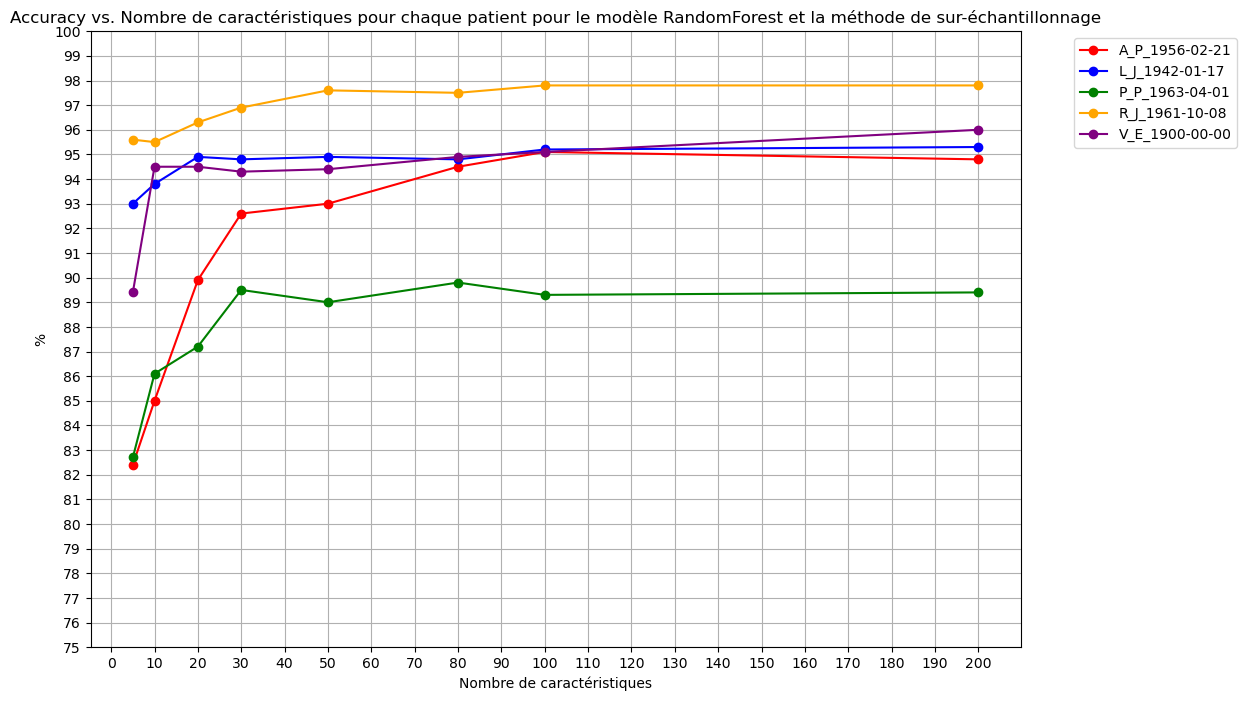

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100.csv"
data = pd.read_csv(file_path)

# Filter data for RandomForest model
rf_data = data[data['Model'] == 'RandomForest']

# Plotting the Sensitivity and Specificity for each patient on the same graph with more distinctive colors
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = rf_data['Identifier'].unique()

# Plot each patient's Sensitivity and Specificity curves with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = rf_data[rf_data['Identifier'] == patient_id]
    #grouped_data = patient_data.groupby('Top N Features')[['Sensitivity', 'Specificity']].mean().reset_index()
    #grouped_data = patient_data.groupby('Top N Features')[['F-score']].mean().reset_index()
    grouped_data = patient_data.groupby('Top N Features')[['Accuracy']].mean().reset_index()
    

    patient_label = patient_id.replace('_all_extraction_features', '')
    #plt.plot(grouped_data['Top N Features'], grouped_data['Sensitivity'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} Sensitivity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['Specificity'], marker='x', linestyle='--', color=colors[i], label=f"{patient_label} Specificity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['F-score'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} F-score")
    plt.plot(grouped_data['Top N Features'], grouped_data['Accuracy'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label}")



plt.title('Accuracy vs. Nombre de caractéristiques pour chaque patient pour le modèle RandomForest et la méthode de sur-échantillonnage')
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('%')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(75, 100)
plt.yticks(ticks=range(75, 101, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Optimisé

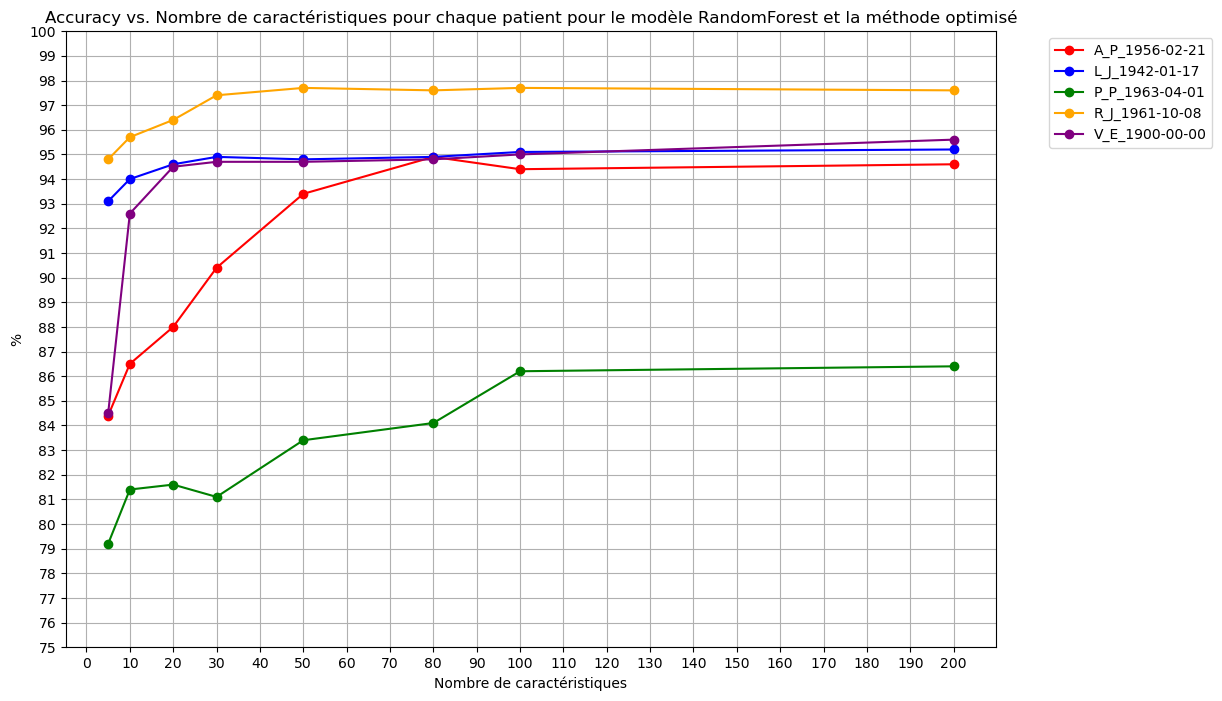

In [28]:
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_optimise.csv"
data = pd.read_csv(file_path)

# Filter data for RandomForest model
rf_data = data[data['Model'] == 'RandomForest']

# Plotting the Sensitivity and Specificity for each patient on the same graph with more distinctive colors
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = rf_data['Identifier'].unique()

# Plot each patient's Sensitivity and Specificity curves with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = rf_data[rf_data['Identifier'] == patient_id]
    #grouped_data = patient_data.groupby('Top N Features')[['Sensitivity', 'Specificity']].mean().reset_index()
    #grouped_data = patient_data.groupby('Top N Features')[['F-score']].mean().reset_index()
    grouped_data = patient_data.groupby('Top N Features')[['Accuracy']].mean().reset_index()
    

    patient_label = patient_id.replace('_all_extraction_features', '')
    #plt.plot(grouped_data['Top N Features'], grouped_data['Sensitivity'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} Sensitivity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['Specificity'], marker='x', linestyle='--', color=colors[i], label=f"{patient_label} Specificity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['F-score'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} F-score")
    plt.plot(grouped_data['Top N Features'], grouped_data['Accuracy'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label}")



plt.title('Accuracy vs. Nombre de caractéristiques pour chaque patient pour le modèle RandomForest et la méthode optimisé')
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('%')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(75, 100)
plt.yticks(ticks=range(75, 101, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



# Brut

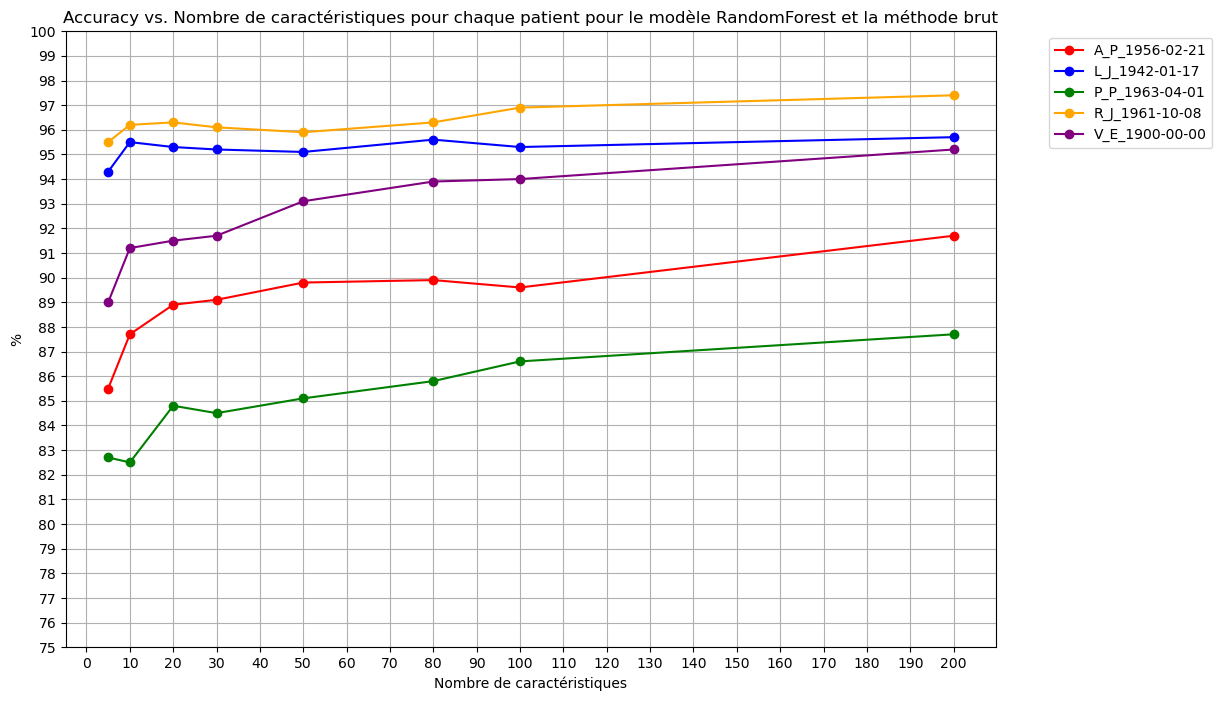

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_brut.csv"
data = pd.read_csv(file_path)

# Filter data for RandomForest model
rf_data = data[data['Model'] == 'RandomForest']

# Plotting the Sensitivity and Specificity for each patient on the same graph with more distinctive colors
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = rf_data['Identifier'].unique()

# Plot each patient's Sensitivity and Specificity curves with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = rf_data[rf_data['Identifier'] == patient_id]
    #grouped_data = patient_data.groupby('Top N Features')[['Sensitivity', 'Specificity']].mean().reset_index()
    #grouped_data = patient_data.groupby('Top N Features')[['F-score']].mean().reset_index()
    grouped_data = patient_data.groupby('Top N Features')[['Accuracy']].mean().reset_index()
    

    patient_label = patient_id.replace('_all_extraction_features', '')
    #plt.plot(grouped_data['Top N Features'], grouped_data['Sensitivity'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} Sensitivity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['Specificity'], marker='x', linestyle='--', color=colors[i], label=f"{patient_label} Specificity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['F-score'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} F-score")
    plt.plot(grouped_data['Top N Features'], grouped_data['Accuracy'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label}")



plt.title('Accuracy vs. Nombre de caractéristiques pour chaque patient pour le modèle RandomForest et la méthode brut')
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('%')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(75, 100)
plt.yticks(ticks=range(75, 101, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



# Données brutes avec Features Over

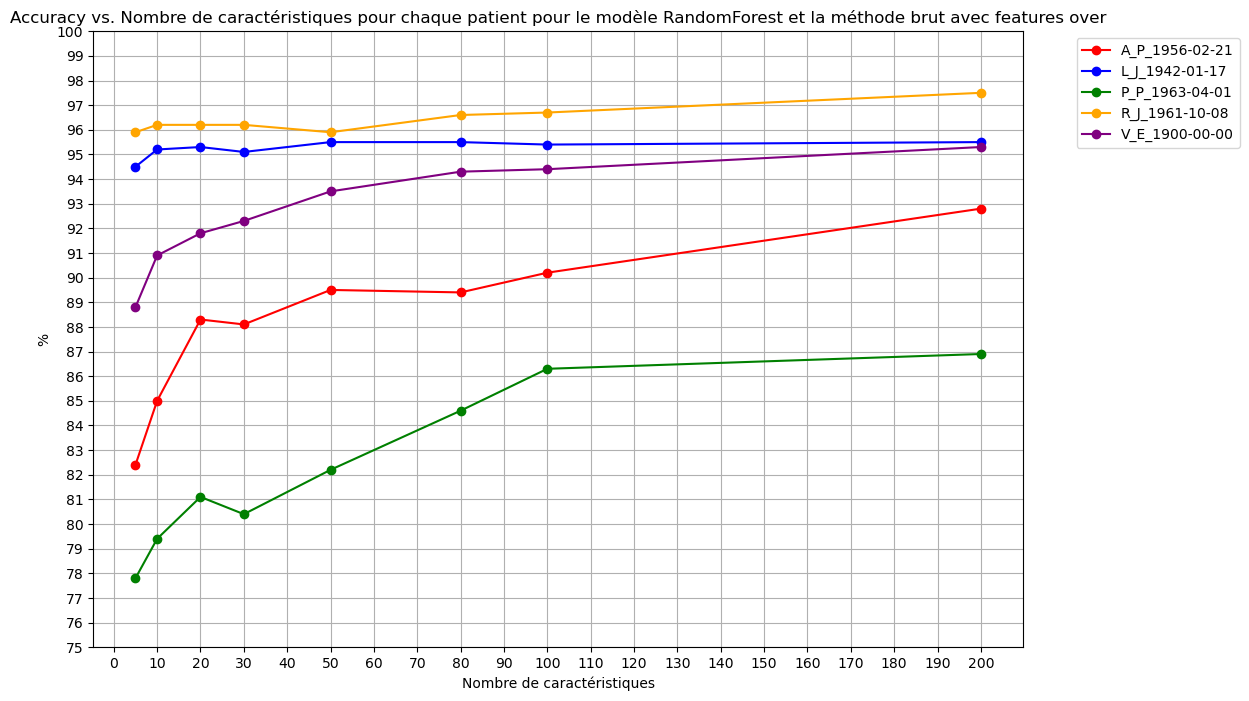

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_relief_brute__over100.csv"
data = pd.read_csv(file_path)

# Filter data for RandomForest model
rf_data = data[data['Model'] == 'RandomForest']

# Plotting the Sensitivity and Specificity for each patient on the same graph with more distinctive colors
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = rf_data['Identifier'].unique()

# Plot each patient's Sensitivity and Specificity curves with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = rf_data[rf_data['Identifier'] == patient_id]
    #grouped_data = patient_data.groupby('Top N Features')[['Sensitivity', 'Specificity']].mean().reset_index()
    #grouped_data = patient_data.groupby('Top N Features')[['F-score']].mean().reset_index()
    grouped_data = patient_data.groupby('Top N Features')[['Accuracy']].mean().reset_index()
    

    patient_label = patient_id.replace('_all_extraction_features', '')
    #plt.plot(grouped_data['Top N Features'], grouped_data['Sensitivity'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} Sensitivity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['Specificity'], marker='x', linestyle='--', color=colors[i], label=f"{patient_label} Specificity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['F-score'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} F-score")
    plt.plot(grouped_data['Top N Features'], grouped_data['Accuracy'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label}")



plt.title('Accuracy vs. Nombre de caractéristiques pour chaque patient pour le modèle RandomForest et les données brutes avec features over')
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('%')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(75, 100)
plt.yticks(ticks=range(75, 101, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



# Données Over avec Features Brute

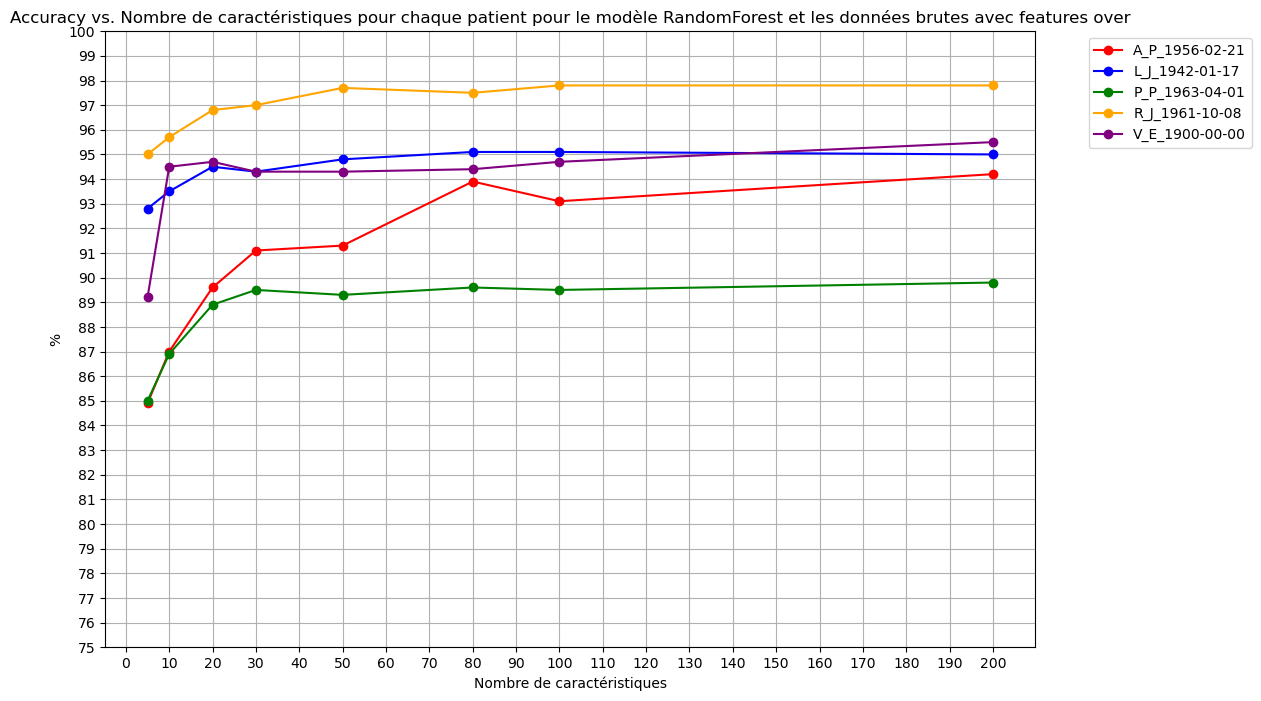

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_relief_over__brut.csv"
data = pd.read_csv(file_path)

# Filter data for RandomForest model
rf_data = data[data['Model'] == 'RandomForest']

# Plotting the Sensitivity and Specificity for each patient on the same graph with more distinctive colors
plt.figure(figsize=(12, 8))

# Define a color palette with enough distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
patient_ids = rf_data['Identifier'].unique()

# Plot each patient's Sensitivity and Specificity curves with distinctive colors
for i, patient_id in enumerate(patient_ids):
    patient_data = rf_data[rf_data['Identifier'] == patient_id]
    #grouped_data = patient_data.groupby('Top N Features')[['Sensitivity', 'Specificity']].mean().reset_index()
    #grouped_data = patient_data.groupby('Top N Features')[['F-score']].mean().reset_index()
    grouped_data = patient_data.groupby('Top N Features')[['Accuracy']].mean().reset_index()
    

    patient_label = patient_id.replace('_all_extraction_features', '')
    #plt.plot(grouped_data['Top N Features'], grouped_data['Sensitivity'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} Sensitivity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['Specificity'], marker='x', linestyle='--', color=colors[i], label=f"{patient_label} Specificity")
    #plt.plot(grouped_data['Top N Features'], grouped_data['F-score'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label} F-score")
    plt.plot(grouped_data['Top N Features'], grouped_data['Accuracy'], marker='o', linestyle='-', color=colors[i], label=f"{patient_label}")



plt.title('Accuracy vs. Nombre de caractéristiques pour chaque patient pour le modèle RandomForest et les données brutes avec features over')
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('%')
plt.xticks(ticks=range(0, 210, 10))
plt.ylim(75, 100)
plt.yticks(ticks=range(75, 101, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [4]:
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the directory containing the CSV files
# directory = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient'

# # Define the color palette
# palette = {
#     'Sur-échantillonné': "#FF6347", 
#     'Optimisé': "#4682B4", 
#     'Brute': "#32CD32"
# }

# # Function to extract patient ID and method from filename
# def extract_info_from_filename(filename):
#     basename = os.path.basename(filename)
#     patient_id = '_'.join(basename.split('_')[:3])
#     if 'brut' in basename:
#         method = 'Brute'
#     elif 'optimise' in basename:
#         method = 'Optimisé'
#     elif 'over100' in basename:
#         method = 'Sur-échantillonné'
#     return patient_id, method

# # Load and combine all data
# all_scores = pd.DataFrame()
# for file in os.listdir(directory):
#     if file.endswith('.csv'):
#         file_path = os.path.join(directory, file)
#         df_temp = pd.read_csv(file_path).head(20)  # Assuming we want the top 20 features initially
#         patient_id, method = extract_info_from_filename(file_path)
#         df_temp['Patient'] = patient_id
#         df_temp['Méthode'] = method
#         all_scores = pd.concat([all_scores, df_temp], ignore_index=True)


# # Filter the top N features for each patient and method
# top_n = 5
# top_features = all_scores.groupby(['Patient', 'Méthode']).apply(lambda x: x.nlargest(top_n, 'Score')).reset_index(drop=True)

# # # Create a dot plot (scatter plot) for the top features with cross markers
# # plt.figure(figsize=(20, 10))
# # sns.scatterplot(data=top_features, x='Patient', y='Feature', hue='Méthode', style='Méthode', markers=['X', 'o', 's'], s=100, palette=palette)
# # plt.title('Top 5 Important Features for Each Patient and Method', fontsize=16)
# # plt.xlabel('Patients', fontsize=14)
# # plt.ylabel('Features', fontsize=14)
# # plt.xticks(rotation=45, ha='right', fontsize=12)
# # plt.yticks(fontsize=12)
# # plt.legend(title='Méthode', fontsize=12, title_fontsize=14, loc='upper left')
# # plt.tight_layout()
# # plt.show()


# # Create the strip plot with vertical separation for methods
# plt.figure(figsize=(20, 15))

# # Create a strip plot with crosses for each method
# sns.stripplot(
#     data=top_features, x='Patient', y='Feature', hue='Méthode', 
#     palette=palette, dodge=True, jitter=True, marker='o', size=10, linewidth=1
# )

# plt.grid(True)
# plt.title('Comparaison des 5 caractéristiques les plus importantes par Méthode et par Patient', fontsize=24)  # Increase title font size
# plt.xlabel('Patient', fontsize=20)  # Increase x-axis label font size
# plt.ylabel('Caractéristique', fontsize=20)  # Increase y-axis label font size
# plt.xticks(rotation=45, ha='right', fontsize=18)  # Increase x-tick font size
# plt.yticks(fontsize=18)  # Increase y-tick font size
# plt.legend(title='', fontsize=18, title_fontsize=20, loc='upper left')  # Increase legend font sizes
# plt.grid(True)  # Enable the grid
# plt.tight_layout()
# plt.show()


In [6]:
# Load the two CSV files
file_path_optimise = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_optimise.csv'
file_path_over100 = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100.csv'

data_optimise = pd.read_csv(file_path_optimise)
data_over100 = pd.read_csv(file_path_over100)

# Create a comparison table for 'CV Accuracy Mean AUC' based on 'Top N Features' and patient
comparison_table = pd.merge(
    data_over100[['Identifier', 'Top N Features', 'CV Accuracy Mean AUC']],
    data_optimise[['Identifier', 'Top N Features', 'CV Accuracy Mean AUC']],
    on=['Identifier', 'Top N Features'],
    suffixes=('_over100', '_optimise')
)

# Save the comparison table as a CSV file
comparison_table.to_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/comparison_table_cv_accuracy_mean_auc.csv', index=False)
# Display the first few rows of the comparison table
print(comparison_table.head())


                               Identifier  Top N Features  \
0  A_P_1956-02-21_all_extraction_features               5   
1  L_J_1942-01-17_all_extraction_features               5   
2  P_P_1963-04-01_all_extraction_features               5   
3  R_J_1961-10-08_all_extraction_features               5   
4  V_E_1900-00-00_all_extraction_features               5   

   CV Accuracy Mean AUC_over100  CV Accuracy Mean AUC_optimise  
0                      0.930165                       0.871855  
1                      0.980987                       0.980695  
2                      0.926130                       0.792617  
3                      0.977242                       0.976521  
4                      0.965845                       0.907304  


# Distribution train et test

In [3]:
import os
import pandas as pd

def get_class_distribution(directory, file_prefix, class_column='label'):
    distribution_by_file = {}
    
    for filename in os.listdir(directory):
        if filename.startswith(file_prefix) and filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            data = pd.read_csv(filepath)
            if class_column in data.columns:
                class_counts = {
                    0: (data[class_column] == 0).sum(),
                    1: (data[class_column] == 1).sum()
                }
                distribution_by_file[filename] = class_counts
            else:
                print(f"Warning: Column '{class_column}' not found in {filename}")
    
    return distribution_by_file

# Paths to the directories
test_directory = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/test'
train_directory = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/train'

# Get class distributions
test_distribution = get_class_distribution(test_directory, "y_test")
train_distribution = get_class_distribution(train_directory, "y_train")

# Display the distributions for each file
print("Class distribution in test data for each file:")
for file, distribution in test_distribution.items():
    print(f"{file}: {distribution}")

print("\nClass distribution in train data for each file:")
for file, distribution in train_distribution.items():
    print(f"{file}: {distribution}")


Class distribution in test data for each file:
y_test_A_P_1956-02-21_all_extraction_features_brut.csv: {0: 1061, 1: 322}
y_test_L_J_1942-01-17_all_extraction_features_brut.csv: {0: 1259, 1: 1468}
y_test_P_P_1963-04-01_all_extraction_features_brut.csv: {0: 1100, 1: 325}
y_test_R_J_1961-10-08_all_extraction_features_brut.csv: {0: 1515, 1: 1628}
y_test_V_E_1900-00-00_all_extraction_features_brut.csv: {0: 1202, 1: 2214}

Class distribution in train data for each file:
y_train_A_P_1956-02-21_all_extraction_features_brut.csv: {0: 2474, 1: 751}
y_train_L_J_1942-01-17_all_extraction_features_brut.csv: {0: 2938, 1: 3423}
y_train_P_P_1963-04-01_all_extraction_features_brut.csv: {0: 2566, 1: 758}
y_train_R_J_1961-10-08_all_extraction_features_brut.csv: {0: 3535, 1: 3798}
y_train_V_E_1900-00-00_all_extraction_features_brut.csv: {0: 2804, 1: 5164}


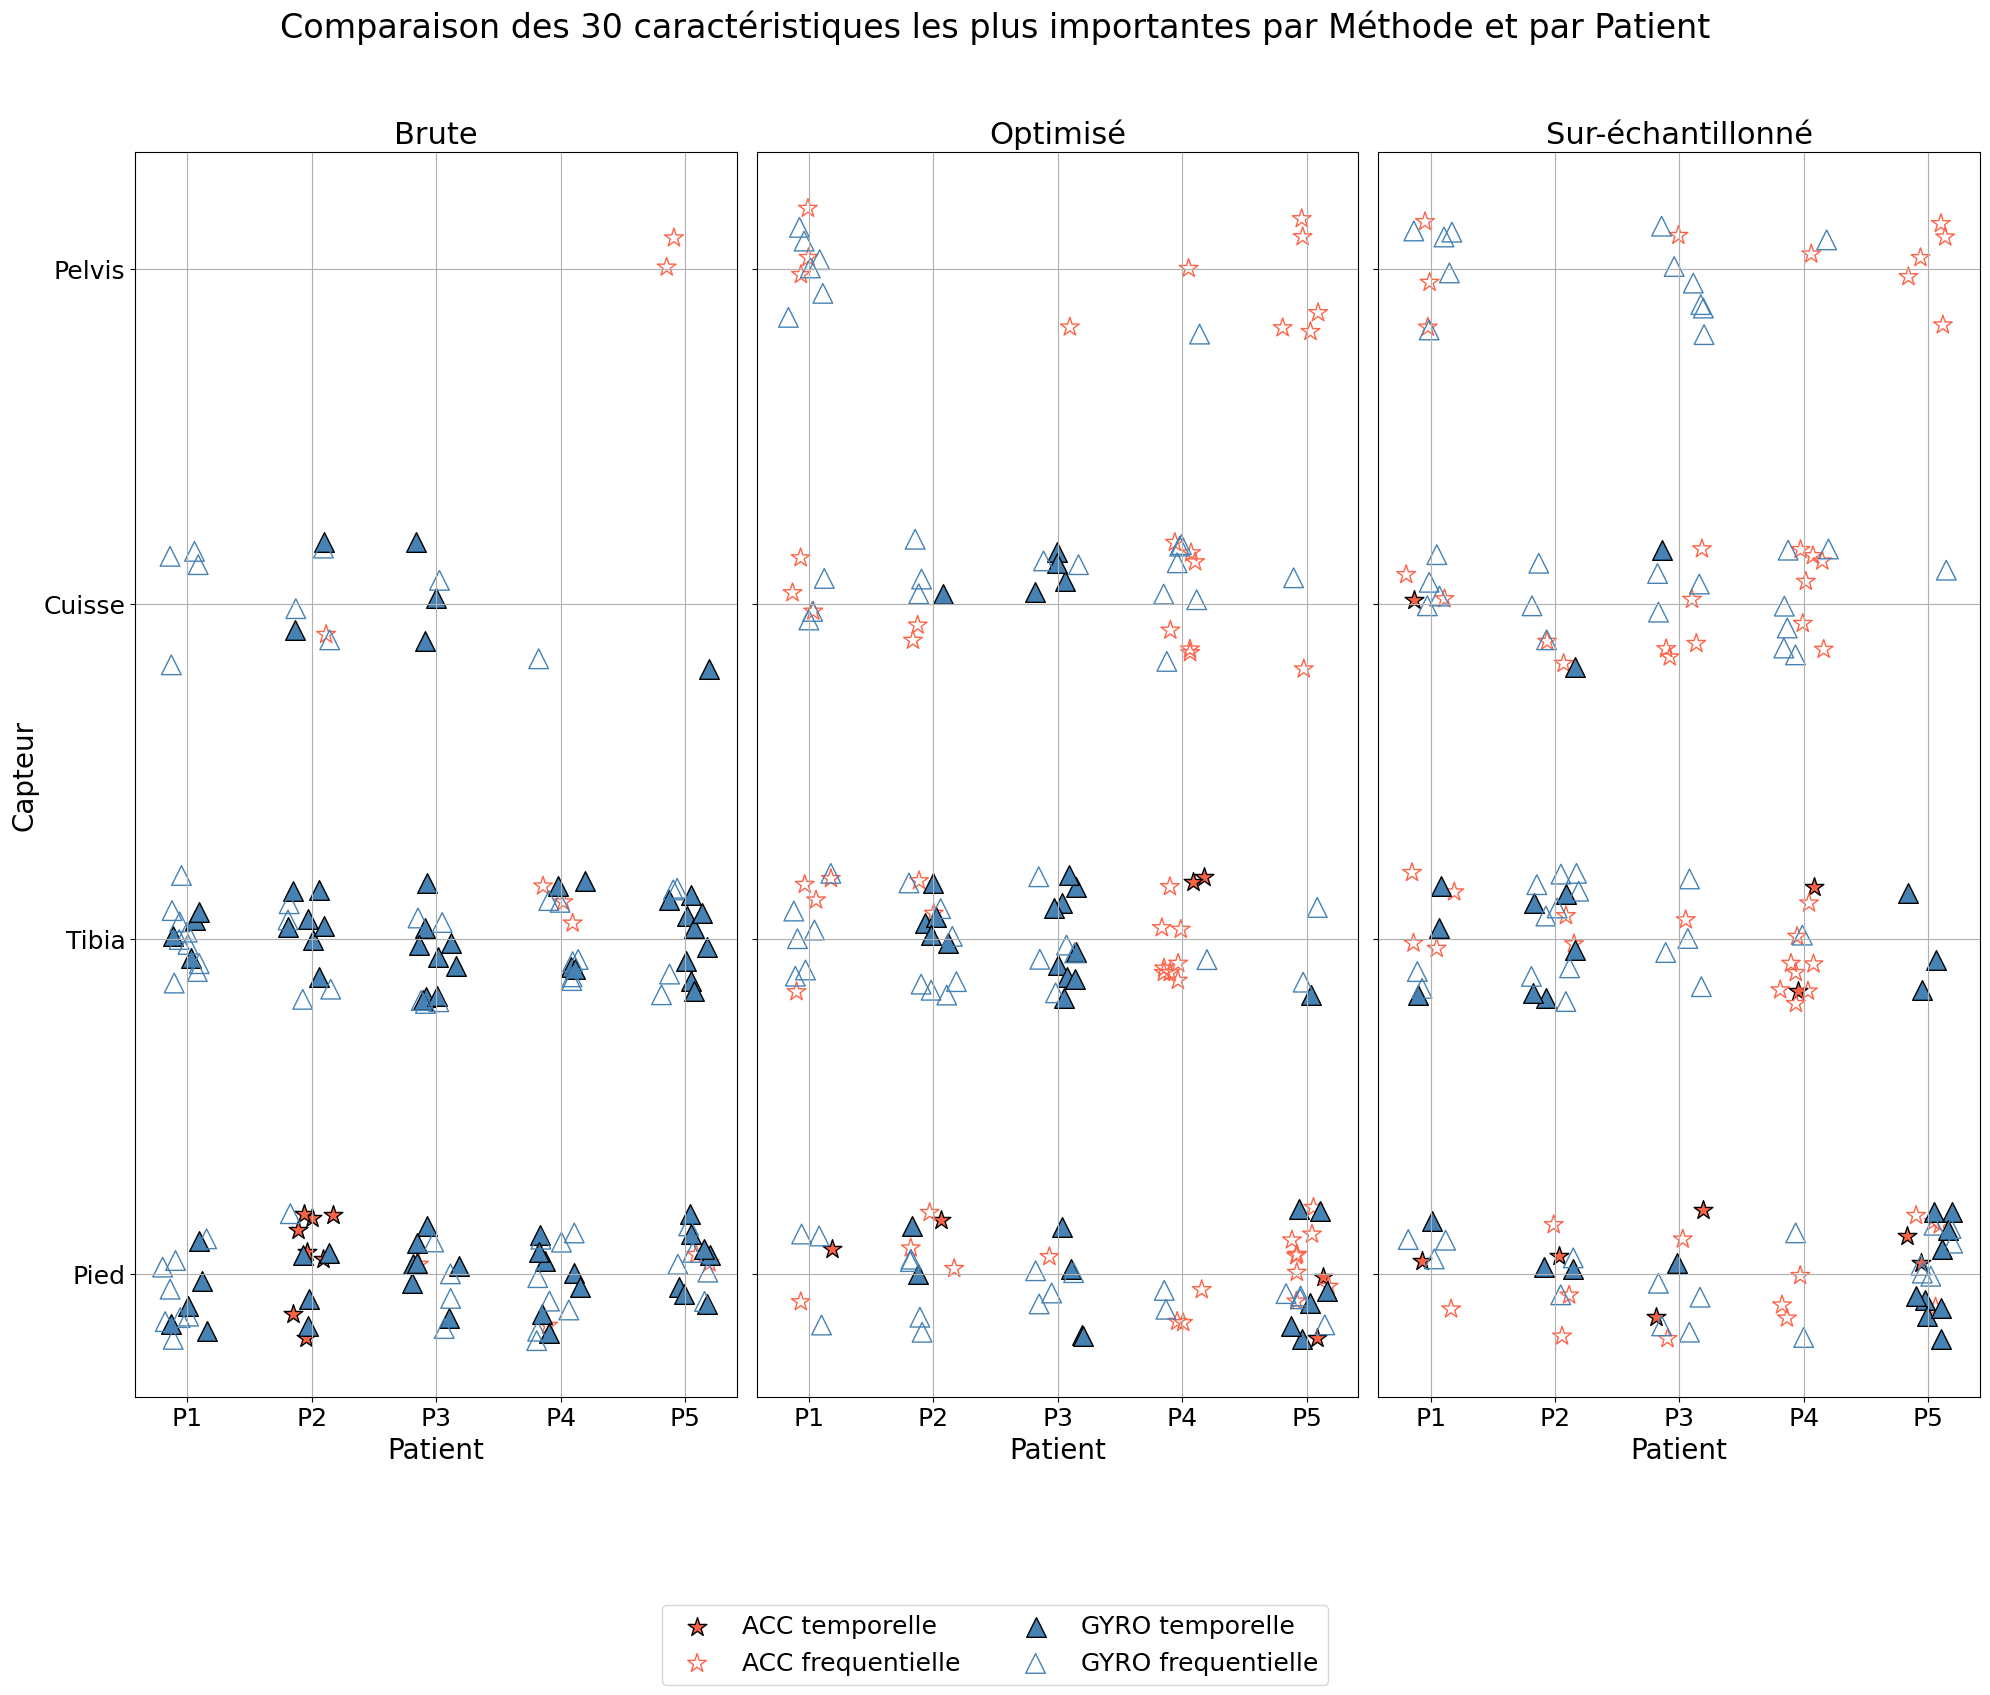

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the CSV files
directory = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient/'

# Define the shape and color for different sensors and characteristics
sensor_shape = {
    'ACC': '*',  # Star for Accelerometer
    'GYRO': '^'  # Triangle for Gyroscope
}

# Define the color for each sensor type
sensor_color = {
    'ACC': "#FF6347",  # Red for Accelerometer
    'GYRO': "#4682B4"  # Blue for Gyroscope
}

# List of terms indicating temporal characteristics
temporal_terms = [
    'Coefficient_Variation', 'Increments_Mean', 'Kurtosis_Temporal', 
    'Skewness_Temporal', 'Interquartile_range', '75th_percentile', 
    '25th_percentile', 'Median_Absolute_Deviation', 'Mean_Absolute_Value', 
    'Trimmed_Mean', 'Median_Temporal', 'RMS', 'Range', 'Energy_Temporal', 
    'Variance_Temporal', 'Ecart_Type_Temporal', 'Mean_Temporal'
]

# Function to extract patient ID and method from filename
def extract_info_from_filename(filename):
    basename = os.path.basename(filename)
    patient_id = '_'.join(basename.split('_')[:3])
    if 'brut' in basename:
        method = 'Brute'
    elif 'optimise' in basename:
        method = 'Optimisé'
    elif 'over100' in basename:
        method = 'Sur-échantillonné'
    return patient_id, method

# Function to determine sensor type, feature type, and segment from feature name
def determine_sensor_feature_segment(feature_name):
    sensor = 'ACC' if 'ACC' in feature_name else 'GYRO'
    feature_type = 'temporelle' if any(term in feature_name for term in temporal_terms) else 'frequentielle'
    if 'Pelvis' in feature_name:
        segment = 'Pelvis'
    elif 'Thigh' in feature_name:
        segment = 'Cuisse'
    elif 'Shank' in feature_name:
        segment = 'Tibia'
    elif 'Foot' in feature_name:
        segment = 'Pied'
    else:
        segment = 'Unknown'
    return sensor, feature_type, segment

# Load and combine all data
all_scores = pd.DataFrame()
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df_temp = pd.read_csv(file_path).head(100)  # Assuming we want the top 20 features initially
        patient_id, method = extract_info_from_filename(file_path)
        df_temp['Patient'] = patient_id
        df_temp['Méthode'] = method
        all_scores = pd.concat([all_scores, df_temp], ignore_index=True)

# Filter the top N features for each patient and method
top_n = 30
top_features = all_scores.groupby(['Patient', 'Méthode']).apply(lambda x: x.nlargest(top_n, 'Score')).reset_index(drop=True)

# Add sensor type, feature type, and segment to the dataframe
top_features[['Capteur', 'Type de Caractéristique', 'Segment']] = top_features['Feature'].apply(determine_sensor_feature_segment).apply(pd.Series)

# Convert patient IDs to numeric indices for plotting, but retain the original labels
patient_labels = top_features['Patient'].astype('category').cat.categories
patient_mapping = {patient: f'P{idx+1}' for idx, patient in enumerate(patient_labels)}
top_features['Patient_Label'] = top_features['Patient'].map(patient_mapping)
top_features['Patient'] = top_features['Patient'].astype('category').cat.codes

# Reorder the segments in the desired order
segment_order = ['Pied', 'Tibia', 'Cuisse', 'Pelvis']

segment_mapping = {segment: idx for idx, segment in enumerate(segment_order)}
top_features['Segment'] = top_features['Segment'].map(segment_mapping)

# Adding a small offset for each method to avoid overlapping
method_offsets = {'Brute': 0, 'Optimisé': 0, 'Sur-échantillonné': 0}

# Adding significant vertical variation to differentiate identical points
def add_jitter(values, jitter_amount=0.4):
    return values + jitter_amount * (np.random.random(len(values)) - 0.5)

# Plotting the graph
methods = top_features['Méthode'].unique()
fig, axes = plt.subplots(1, len(methods), figsize=(20, 15), sharex=True, sharey=True)

for ax, method in zip(axes, methods):
    method_data = top_features[top_features['Méthode'] == method]
    offset = method_offsets[method]
    for sensor in sensor_shape:
        sensor_data = method_data[method_data['Capteur'] == sensor]
        for feature_type in ['temporelle', 'frequentielle']:
            feature_data = sensor_data[sensor_data['Type de Caractéristique'] == feature_type]
            y_values = add_jitter(feature_data['Segment'])
            x_values = add_jitter(feature_data['Patient'])
            color = sensor_color[sensor]
            if feature_type == 'temporelle':
                ax.scatter(x_values + offset, y_values, 
                           label=f'{sensor} {feature_type}', 
                           c=color, 
                           marker=sensor_shape[sensor],
                           edgecolor='black', s=200)
            else:  # feature_type == 'frequentielle'
                ax.scatter(x_values + offset, y_values, 
                           label=f'{sensor} {feature_type}', 
                           facecolors='none', edgecolors=color, 
                           marker=sensor_shape[sensor], s=200)
    ax.set_title(method, fontsize=22)  # Increase the font size of the titles
    ax.grid(True)

# Customizing the plot
for ax in axes:
    ax.set_xticks(ticks=np.arange(len(patient_mapping)))
    ax.set_xticklabels([patient_mapping[p] for p in patient_labels], ha='center', fontsize=18)
    ax.set_yticks(ticks=np.arange(len(segment_order)))
    ax.set_yticklabels(segment_order, fontsize=18)

axes[0].set_ylabel('Capteur', fontsize=20)
for ax in axes:
    ax.set_xlabel('Patient', fontsize=20)

fig.suptitle(f'Comparaison des {top_n} caractéristiques les plus importantes par Méthode et par Patient', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=18, borderaxespad=2)
plt.show()


# Cross-méthode et relief f

c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\antho\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

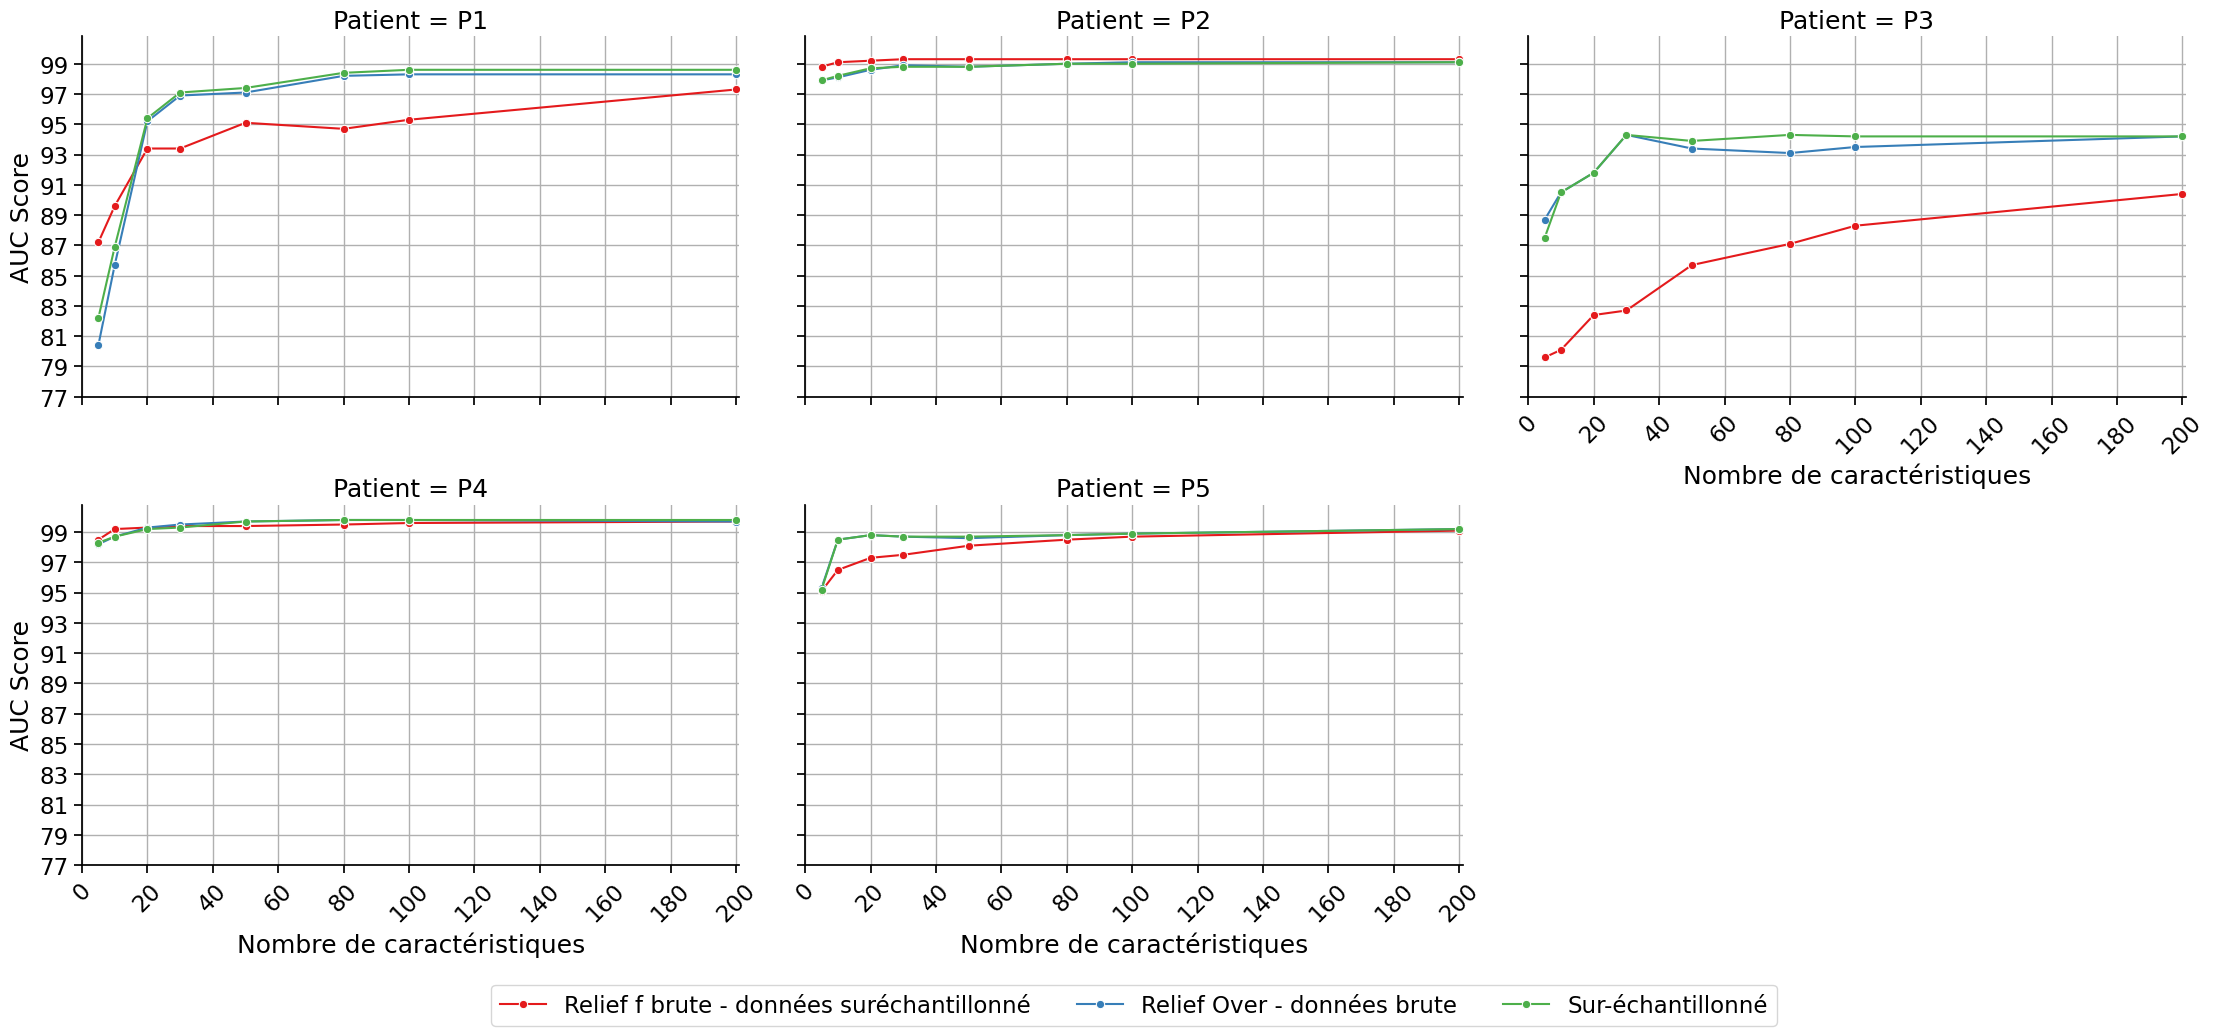

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_relief_brute__over100_modified.csv"
file_path_optimise = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_relief_over__brut_modified.csv"
file_path_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_by_patient_over100_modified.csv"

df_brut = pd.read_csv(file_path_brute)
df_optimise = pd.read_csv(file_path_optimise)
df_over = pd.read_csv(file_path_over)

# Add a column to indicate the method
df_brut['Method'] = 'Relief f brute - données suréchantillonné'
df_optimise['Method'] = 'Relief Over - données brute'
df_over['Method'] = 'Sur-échantillonné'

# Combine the DataFrames
df_combined = pd.concat([df_brut, df_optimise, df_over])

# Remove "_all_extraction_features" from patient names
df_combined['Patient'] = df_combined['Identifier'].str.replace('_all_extraction_features', '')

# Create a mapping from patient names to P1, P2, ...
patient_labels = df_combined['Patient'].unique()
patient_mapping = {patient: f'P{idx+1}' for idx, patient in enumerate(patient_labels)}
df_combined['Patient'] = df_combined['Patient'].map(patient_mapping)

# Adjust Seaborn style parameters for font size
sns.set_context("notebook", font_scale=1.5)

# Create the FacetGrid
g = sns.FacetGrid(df_combined, col="Patient", hue="Method", col_wrap=3, sharey=True, sharex=True, palette="Set1", height=5, aspect=1.5)
g.map(sns.lineplot, "Top N Features", "AUC", marker='o')

# Add a grid to each plot
def add_grid(*args, **kwargs):
    ax = plt.gca()
    ax.grid(True)
    ax.set_ylim(77, df_combined["AUC"].max() + 1)
    ax.set_yticks(range(77, int(df_combined["AUC"].max() + 1), 2))
    ax.set_xlim(0, df_combined["Top N Features"].max() + 1)
    ax.set_xticks(range(0, int(df_combined["Top N Features"].max()) + 1, 20))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

g.map(add_grid)

# Adjust axis labels
g.set_axis_labels("Nombre de caractéristiques", "AUC Score")

# Adjust the layout to have good separation between facets
plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Add the custom legend
handles, labels = g.axes[0].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=3)

# Show the plot
plt.show()


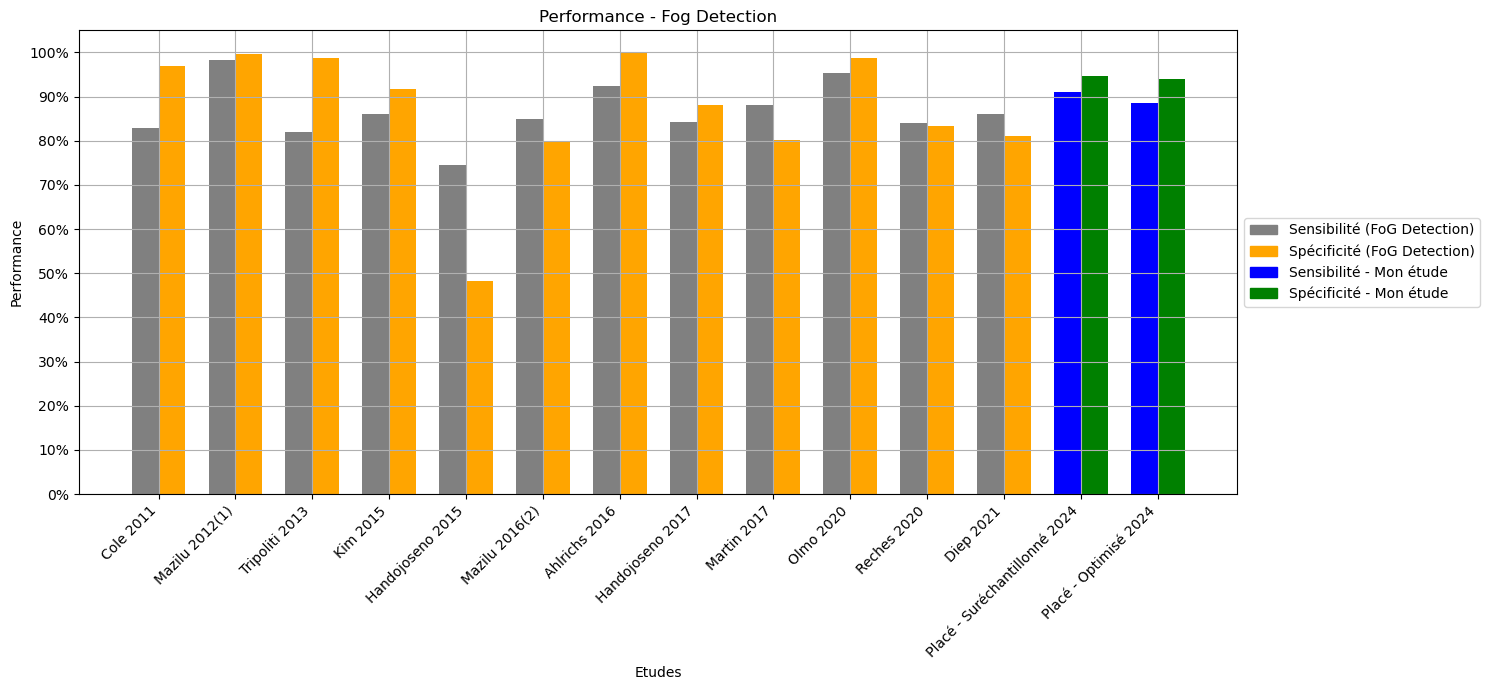

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Updating the labels to remove the associated FoG prediction labels
labels = [
    'Cole 2011', 'Mazilu 2012(1)', 'Tripoliti 2013', 'Kim 2015','Handojoseno 2015', 
    'Mazilu 2016(2)', 'Ahlrichs 2016', 'Handojoseno 2017', 'Martin 2017', 'Olmo 2020', 'Reches 2020', 
    'Diep 2021', 'Placé - Suréchantillonné 2024', 'Placé - Optimisé 2024'
]

# Maezilu 2012 et 2016 et Martin et Olmo patient dependant 


sensitivity_detection = [83.0, 98.35, 81.94, 86.0, 74.6,85.0, 92.3, 84.2, 88.09, 95.4, 84.1, 86, 91, 88.6]
specificity_detection = [97.0, 99.72, 98.74, 91.7, 48.2,80.0, 100.0, 88, 80.08, 98.8, 83.4, 81, 94.6, 94]

# Creating the updated bar chart
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


# Define colors for each bar
colors_sensitivity = ['gray'] * len(labels)
colors_specificity = ['orange'] * len(labels)

# Change colors for specific labels
highlight_labels = ['Placé - Suréchantillonné 2024', 'Placé - Optimisé 2024']
highlight_color_sensitivity = 'blue'
highlight_color_specificity = 'green'

for i, label in enumerate(labels):
    if label in highlight_labels:
        colors_sensitivity[i] = highlight_color_sensitivity
        colors_specificity[i] = highlight_color_specificity

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, sensitivity_detection, width, label='Sensibilité (FoG Detection)', color=colors_sensitivity)
rects2 = ax.bar(x + width/2, specificity_detection, width, label='Spécificité (FoG Detection)', color=colors_specificity)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Etudes')
ax.set_ylabel('Performance')
ax.set_title('Performance - Fog Detection')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)])

# Create custom legend patches
legend_elements = [
    Patch(facecolor='gray', edgecolor='gray', label='Sensibilité (FoG Detection)'),
    Patch(facecolor='orange', edgecolor='orange', label='Spécificité (FoG Detection)'),
    Patch(facecolor='blue', edgecolor='blue', label='Sensibilité - Mon étude'),
    Patch(facecolor='green', edgecolor='green', label='Spécificité - Mon étude')
]

# Add the custom legend to the plot
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
fig.tight_layout()

plt.show()